In [4]:
import pandas as pd
import glob
import csv
import numpy as np
from datetime import timedelta
from datetime import datetime
import collections
from collections import Counter
import statistics
import matplotlib.pyplot as plt

In [8]:
### LOAD DATAFRAME

df_all = pd.read_pickle('../Desktop/saved_dataframes/Store_indiegogo_dataframes.pkl')

print('Current number of projects with all goal amounts: ')
print(len(df_all))

Current number of projects with all goal amounts: 
58611


In [9]:
### FUNDED AND UNFUNDED DATAFRAMES

# Extract successful projects
df_success = df_all.loc[(df_all['state'] == 'successful')]
# Extract failed projects
df_fail = df_all.loc[(df_all['state'] == 'failed')]

# Overall probability of success
prob_success = len(df_success) / len(df_all)

print('Data subset:')
print('Current number of projects: ')
print(len(df_all))
print('Current number of funded projects: ')
print(len(df_success))
print('Current number of non-funded projects: ')
print(len(df_fail))
print('Current number of zero-funded projects: ')
print(len(df_fail.loc[df_fail['usd_pledged'] == 0]))
print('Current probability of success: ')
print(len(df_success) / len(df_all))
print('Projects In Demand: ')
print(len(df_all.loc[df_all['in_demand'] == True]))
print('Projects not In Demand: ')
print(len(df_all.loc[df_all['in_demand'] == False]))
print('Total funding: ')
print(sum(list(df_success['usd_pledged'])))

Data subset:
Current number of projects: 
58611
Current number of funded projects: 
14572
Current number of non-funded projects: 
44039
Current number of zero-funded projects: 
5507
Current probability of success: 
0.24862227226971045
Projects In Demand: 
3407
Projects not In Demand: 
55204
Total funding: 
1340877989


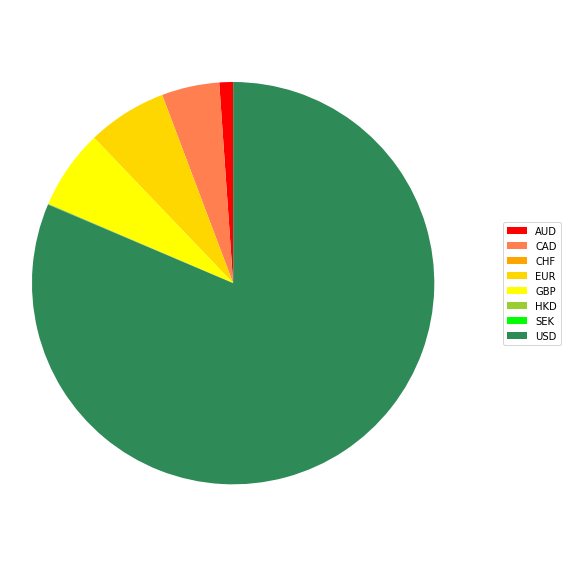

{'AUD': 646, 'CAD': 2717, 'CHF': 2, 'EUR': 3752, 'GBP': 3752, 'HKD': 35, 'SEK': 2, 'USD': 47705}


In [10]:
### ALL CATEGORIES PIE CHART

fig = plt.figure(figsize=(8, 8))
country_freq = df_all['country'].value_counts().to_dict()
country_freq = dict(sorted(country_freq.items()))
colors = ['red','coral','orange','gold','yellow','yellowgreen','lime','seagreen','cyan','darkturquoise','dodgerblue','blue','mediumslateblue','blueviolet','purple','magenta']
patches, texts = plt.pie(country_freq.values(), colors = colors, startangle=90)
plt.legend(patches, country_freq.keys(), loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

print(country_freq)

In [4]:
from scipy import stats

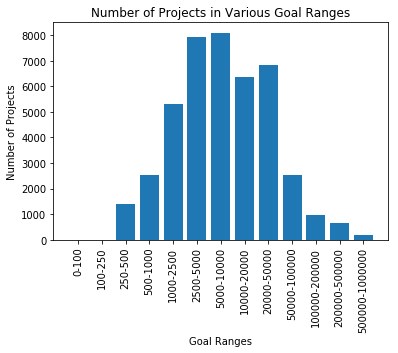

Bar plot values:
{'0-100': 6, '100-250': 3, '250-500': 1414, '500-1000': 2523, '1000-2500': 5285, '2500-5000': 7916, '5000-10000': 8096, '10000-20000': 6344, '20000-50000': 6833, '50000-100000': 2535, '100000-200000': 953, '200000-500000': 666, '500000-1000000': 185}


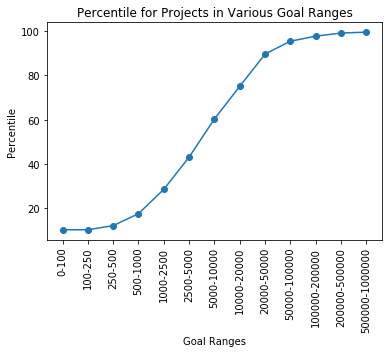

Bar plot values:
{'0-100': 10.07651189602767, '100-250': 10.082800545016246, '250-500': 11.94004821297558, '500-1000': 17.381825804423016, '1000-2500': 28.408971805890367, '2500-5000': 43.03636935331726, '5000-10000': 60.338538937218324, '10000-20000': 75.11267162771198, '20000-50000': 89.73902106697412, '50000-100000': 95.54973273241798, '100000-200000': 97.83670474792999, '200000-500000': 99.23802536421759, '500000-1000000': 99.64469133214548}


In [5]:
### Testing distribution of goal levels

goal = list(df_all['goal']) # all goal sizes
goal_levels = [0, 100, 250, 500, 1000, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000] # various bounds
goal_num = {} # number of projects in various goal ranges
goal_perc = {} # percentile for various goal ranges

# building dictionary
for i in range(1, len(goal_levels)):
    prev = goal_levels[i - 1]
    curr = goal_levels[i]
    # count number of projects within goal range
    goal_num[str(prev) + '-' + str(curr)] = len(df_all.loc[(df_all['goal'] <= curr) & (df_all['goal'] > prev)])
    goal_perc[str(prev) + '-' + str(curr)] = stats.percentileofscore(goal, curr)

# plotting number of projects in various goal ranges
plt.bar(range(len(goal_num)), list(goal_num.values()), align = 'center')
plt.xticks(range(len(goal_num)), list(goal_num.keys()), rotation = 'vertical')
plt.xlabel('Goal Ranges')
plt.ylabel('Number of Projects')
plt.title('Number of Projects in Various Goal Ranges')
plt.show()
print('Bar plot values:')
print(goal_num)

# plotting percentile for projects in various goal ranges
plt.scatter(list(range(len(goal_perc))), list(goal_perc.values()))
plt.plot(list(range(len(goal_perc))), list(goal_perc.values()))
plt.xticks(range(len(goal_perc)), list(goal_perc.keys()), rotation = 'vertical')
plt.xlabel('Goal Ranges')
plt.ylabel('Percentile')
plt.title('Percentile for Projects in Various Goal Ranges')
plt.show()
print('Bar plot values:')
print(goal_perc)

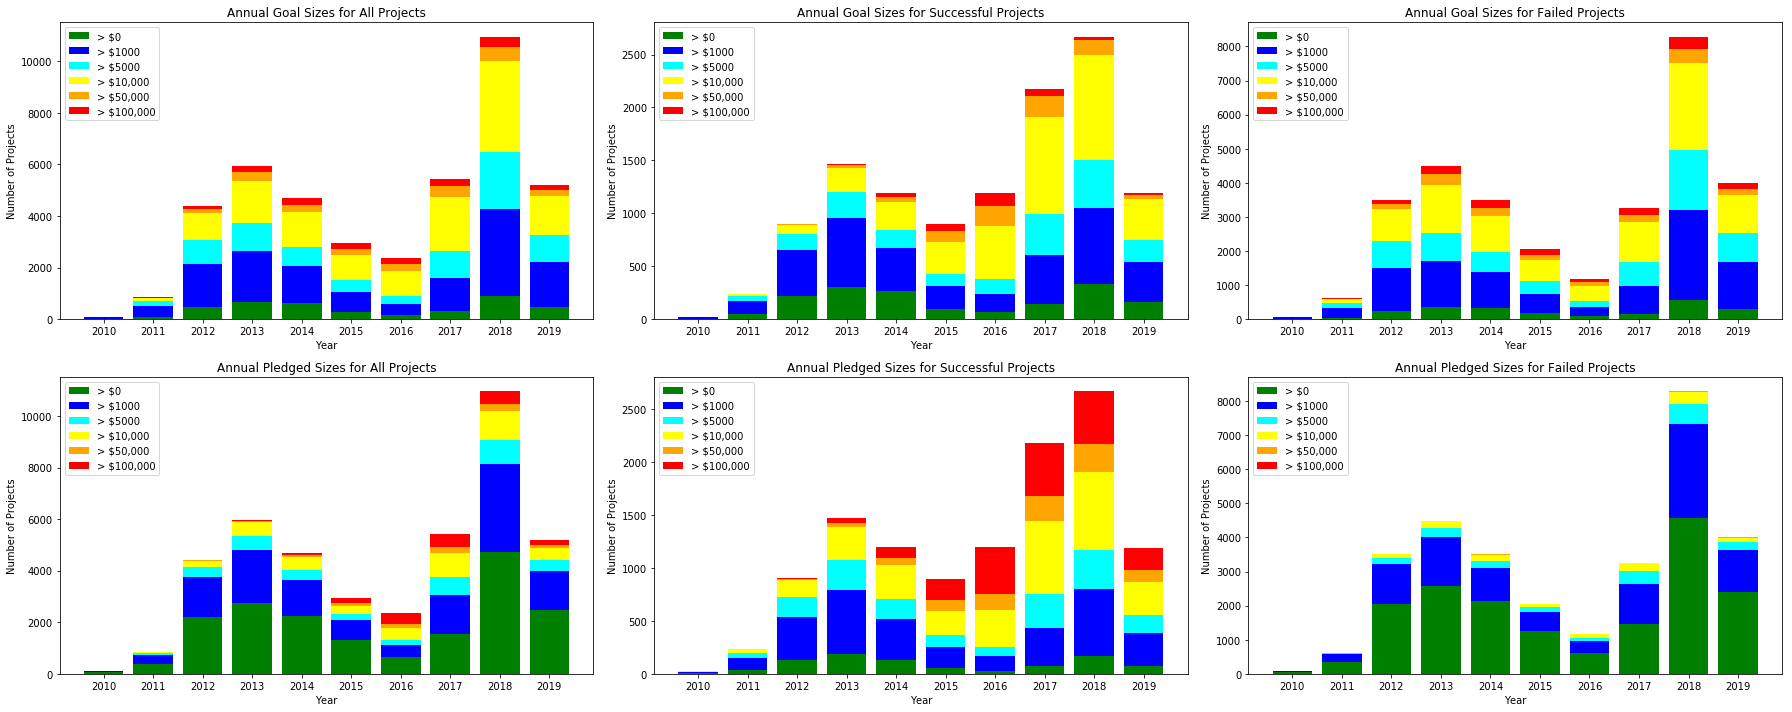

In [6]:
### TESTING DISTRIBUTION OF GOAL SIZES

df_lst = [df_all, df_success, df_fail]
goal_titles = ['Annual Goal Sizes for All Projects', 'Annual Goal Sizes for Successful Projects', 'Annual Goal Sizes for Failed Projects']
pledged_titles = ['Annual Pledged Sizes for All Projects', 'Annual Pledged Sizes for Successful Projects', 'Annual Pledged Sizes for Failed Projects']

fig = plt.figure(figsize = (25,10))

for idx in range(len(df_lst)):
    curr_df = df_lst[idx]
    years = list(curr_df['Created At Year'].drop_duplicates())
    years.sort()

    new_dict = {}
    new_dict_0 = {}
    new_dict_1000 = {}
    new_dict_5000 = {}
    new_dict_10000 = {}
    new_dict_50000 = {}
    new_dict_100000 = {}
    # build dictionaries by putting project in corresponding range
    for i in years:
        temp = curr_df.loc[curr_df['Created At Year'] == i]
        new_dict[i] = list(temp['goal']) # extract goal sizes from each year
        new_dict_0[i] = 0
        new_dict_1000[i] = 0
        new_dict_5000[i] = 0
        new_dict_10000[i] = 0
        new_dict_50000[i] = 0
        new_dict_100000[i] = 0    
    for k, v in new_dict.items():
        for goal in v:
            if goal > 0:
                new_dict_0[k] += 1
            if goal > 1000:
                new_dict_1000[k] += 1
            if goal > 5000:
                new_dict_5000[k] += 1
            if goal > 10000:
                new_dict_10000[k] += 1
            if goal > 50000:
                new_dict_50000[k] += 1
            if goal > 100000:
                new_dict_100000[k] += 1

    lst_0 = np.zeros([len(years)], dtype=int)
    lst_1000 = np.zeros([len(years)], dtype=int)
    lst_5000 = np.zeros([len(years)], dtype=int)
    lst_10000 = np.zeros([len(years)], dtype=int)
    lst_50000 = np.zeros([len(years)], dtype=int)
    lst_100000 = np.zeros([len(years)], dtype=int)
    for i in range(len(years)):
        lst_0[i] = new_dict_0[years[i]] - new_dict_1000[years[i]]
        lst_1000[i] = new_dict_1000[years[i]] - new_dict_5000[years[i]]
        lst_5000[i] = new_dict_5000[years[i]] - new_dict_10000[years[i]]
        lst_10000[i] = new_dict_10000[years[i]] - new_dict_50000[years[i]]
        lst_50000[i] = new_dict_50000[years[i]] - new_dict_100000[years[i]]
        lst_100000[i] = new_dict_100000[years[i]]

    ind = np.arange(len(years))
    plt.subplot(2, 3, idx+1)
    plt.bar(ind, lst_0, width=0.8, label='> $0', color='green')
    plt.bar(ind, lst_1000, width=0.8, label='> $1000', color='blue', bottom=lst_0)
    plt.bar(ind, lst_5000, width=0.8, label='> $5000', color='cyan', bottom=lst_0+lst_1000)
    plt.bar(ind, lst_10000, width=0.8, label='> $10,000', color='yellow', bottom=lst_0+lst_1000+lst_5000)
    plt.bar(ind, lst_50000, width=0.8, label='> $50,000', color='orange', bottom=lst_0+lst_1000+lst_5000+lst_10000)
    plt.bar(ind, lst_100000, width=0.8, label='> $100,000', color='red', bottom=lst_0+lst_1000+lst_5000+lst_10000+lst_50000)

    plt.xticks(ind, years)
    plt.ylabel("Number of Projects")
    plt.xlabel("Year")
    plt.legend(loc="best")
    plt.title(goal_titles[idx])
    
for idx in range(len(df_lst)):
    curr_df = df_lst[idx]
    years = list(curr_df['Created At Year'].drop_duplicates())
    years.sort()

    new_dict = {}
    new_dict_0 = {}
    new_dict_1000 = {}
    new_dict_5000 = {}
    new_dict_10000 = {}
    new_dict_50000 = {}
    new_dict_100000 = {}
    # build dictionaries by putting project in corresponding range
    for i in years:
        temp = curr_df.loc[curr_df['Created At Year'] == i]
        new_dict[i] = list(temp['usd_pledged']) # extract goal sizes from each year
        new_dict_0[i] = 0
        new_dict_1000[i] = 0
        new_dict_5000[i] = 0
        new_dict_10000[i] = 0
        new_dict_50000[i] = 0
        new_dict_100000[i] = 0    
    for k, v in new_dict.items():
        for goal in v:
            if goal > 0:
                new_dict_0[k] += 1
            if goal > 1000:
                new_dict_1000[k] += 1
            if goal > 5000:
                new_dict_5000[k] += 1
            if goal > 10000:
                new_dict_10000[k] += 1
            if goal > 50000:
                new_dict_50000[k] += 1
            if goal > 100000:
                new_dict_100000[k] += 1

    lst_0 = np.zeros([len(years)], dtype=int)
    lst_1000 = np.zeros([len(years)], dtype=int)
    lst_5000 = np.zeros([len(years)], dtype=int)
    lst_10000 = np.zeros([len(years)], dtype=int)
    lst_50000 = np.zeros([len(years)], dtype=int)
    lst_100000 = np.zeros([len(years)], dtype=int)
    for i in range(len(years)):
        lst_0[i] = new_dict_0[years[i]] - new_dict_1000[years[i]]
        lst_1000[i] = new_dict_1000[years[i]] - new_dict_5000[years[i]]
        lst_5000[i] = new_dict_5000[years[i]] - new_dict_10000[years[i]]
        lst_10000[i] = new_dict_10000[years[i]] - new_dict_50000[years[i]]
        lst_50000[i] = new_dict_50000[years[i]] - new_dict_100000[years[i]]
        lst_100000[i] = new_dict_100000[years[i]]

    ind = np.arange(len(years))
    plt.subplot(2, 3, idx+4)
    plt.bar(ind, lst_0, width=0.8, label='> $0', color='green')
    plt.bar(ind, lst_1000, width=0.8, label='> $1000', color='blue', bottom=lst_0)
    plt.bar(ind, lst_5000, width=0.8, label='> $5000', color='cyan', bottom=lst_0+lst_1000)
    plt.bar(ind, lst_10000, width=0.8, label='> $10,000', color='yellow', bottom=lst_0+lst_1000+lst_5000)
    plt.bar(ind, lst_50000, width=0.8, label='> $50,000', color='orange', bottom=lst_0+lst_1000+lst_5000+lst_10000)
    plt.bar(ind, lst_100000, width=0.8, label='> $100,000', color='red', bottom=lst_0+lst_1000+lst_5000+lst_10000+lst_50000)

    plt.xticks(ind, years)
    plt.ylabel("Number of Projects")
    plt.xlabel("Year")
    plt.legend(loc="best")
    plt.title(pledged_titles[idx])

plt.tight_layout()
plt.show()

In [13]:
print('Minimum Goal: $500') # Percentile:
print('Maximum Goal: $50,000') # Percentile:

# applying minimum and maximum goal for data subset
# df1_all = df_all.loc[(df_all['goal'] > 500) & (df_all['goal'] <= 75000)]
# df1_success = df_success.loc[(df_success['goal'] > 500) & (df_success['goal'] <= 75000)]
# df1_fail = df_fail.loc[(df_fail['goal'] > 500) & (df_fail['goal'] <= 75000)]
df1_all = df_all.loc[(df_all['goal'] > 500)]
df1_success = df_success.loc[(df_success['goal'] > 500)]
df1_fail = df_fail.loc[(df_fail['goal'] > 500)]

print()
print('Adjusted Data Subset after setting $500-$50,000 goal range:')
print('Current number of projects: ')
print(len(df1_all))
print('Current number of funded projects: ')
print(len(df1_success))
print('Current number of unfunded projects: ')
print(len(df1_fail))
print('Current number of zero-funded projects: ')
print(len(df1_fail.loc[df1_fail['usd_pledged'] == 0]))
print('Current probability of success: ')
print(len(df1_success) / len(df1_all))

Minimum Goal: $500
Maximum Goal: $50,000

Adjusted Data Subset after setting $500-$50,000 goal range:
Current number of projects: 
51159
Current number of funded projects: 
13823
Current number of unfunded projects: 
37336
Current number of zero-funded projects: 
0
Current probability of success: 
0.27019683731112804


In [14]:
from datetime import datetime

In [15]:
# See the percentage of live projects per month
month_allprojects = df1_all.groupby(['Created At Month/Year']).size().to_dict() # orders in 'numerical order'
ordered_month_allprojects = dict(sorted(month_allprojects.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False)) # orders in 'time order'

# Can't include 10/2018-12/2018 projects because over 50% project outcomes still unknown
# Also remove 4/2009 because of small sample size (< 20 projects)
df2_all = df1_all.loc[~(df1_all['Created At Year'].isin(['2010','2019']))]
df2_success = df1_success.loc[~(df1_success['Created At Year'].isin(['2010','2019']))]
df2_fail = df1_fail.loc[~(df1_fail['Created At Year'].isin(['2010','2019']))]

# Max duration set to 60 days
# df2_all = df2_all.loc[(df2_all['duration'] <= 2) & (df2_all['duration'] > 0.04)]
# df2_success = df2_success.loc[(df2_success['duration'] <= 2) & (df2_success['duration'] > 0.04)]
# df2_fail = df2_fail.loc[(df2_fail['duration'] <= 2) & (df2_fail['duration'] > 0.04)]

# remove outliers
#df2_all = df2_all.loc[df2_all['P/G'] <= 50]
#df2_success = df2_success.loc[df2_success['P/G'] <= 50]

print('Adjusted Data Subset after eliminating 2010 & 2019:')
print('Current number of projects: ')
print(len(df2_all))
print('Current number of funded projects: ')
print(len(df2_success))
print('Current number of unfunded projects: ')
print(len(df2_fail))
print('Current probability of success: ')
print(len(df2_success) / len(df2_all))
print('Total funding: ')
print(sum(list(df2_success['usd_pledged'])))
print('Projects In Demand: ')
print(len(df2_all.loc[df2_all['in_demand'] == True]))
print('Projects not In Demand: ')
print(len(df2_all.loc[df2_all['in_demand'] == False]))

Adjusted Data Subset after eliminating 2010 & 2019:
Current number of projects: 
44395
Current number of funded projects: 
12306
Current number of unfunded projects: 
32089
Current probability of success: 
0.2771933776326163
Total funding: 
1149184613
Projects In Demand: 
2582
Projects not In Demand: 
41813


In [24]:
from collections import OrderedDict

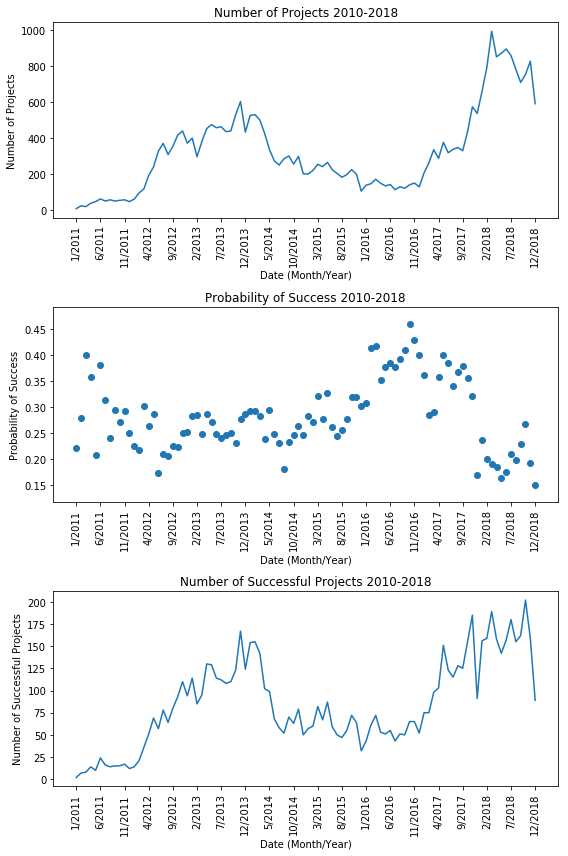

In [39]:
### PLOT NUMBER OF PROJECTS

# sort by date and get number of all projects per month
# key: Month/Year
# value: number of all projects
month_allprojects = df2_all.groupby(['Created At Month/Year']).size().to_dict() # orders in 'numerical order'
ordered_month_allprojects = dict(sorted(month_allprojects.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False)) # orders in 'time order'

fig = plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(list(ordered_month_allprojects.keys()), list(ordered_month_allprojects.values()))
locs, labels = plt.xticks() 
plt.xticks(locs[0::5], rotation='vertical') # plot every 5 months
plt.xlabel('Date (Month/Year)')
plt.ylabel('Number of Projects')
plt.title('Number of Projects 2010-2018')

### PLOT NUMBER OF SUCCESSFUL PROJECTS

# sort by date and get number of successful projects per month
# key: Month/Year
# value: number of successful projects
month_successprojects = df2_success.groupby(['Created At Month/Year']).size().to_dict()
ordered_month_successprojects = dict(sorted(month_successprojects.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))

plt.subplot(3, 1, 3)
plt.plot(list(ordered_month_successprojects.keys()), list(ordered_month_successprojects.values()))
locs, labs = plt.xticks() 
plt.xticks(locs[0::5], rotation='vertical')
plt.xlabel('Date (Month/Year)')
plt.ylabel('Number of Successful Projects')
plt.title('Number of Successful Projects 2010-2018')

### NUMBER OF NON-SUCCESSFUL PROJECTS
# sort by date and get number of successful projects per month
# key: Month/Year
# value: number of successful projects
month_failprojects = df2_fail.groupby(['Created At Month/Year']).size().to_dict()
ordered_month_failprojects = dict(sorted(month_failprojects.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))


### PLOT PROBABILITY OF SUCCESS

# key: Month/Year
# value: probability of success per month
ordered_month_probsuccess = {}
for k in ordered_month_successprojects.keys():
    # probability of success = number of successful projects per month / number of all projects per month
    ordered_month_probsuccess[k] = ordered_month_successprojects[k] / ordered_month_allprojects[k]
    
plt.subplot(3, 1, 2)
plt.scatter(list(ordered_month_probsuccess.keys()), list(ordered_month_probsuccess.values()))
locs, labs = plt.xticks() 
plt.xticks(locs[0::5], rotation='vertical')
plt.xlabel('Date (Month/Year)')
plt.ylabel('Probability of Success')
plt.title('Probability of Success 2010-2018')

plt.tight_layout()
plt.show()

[  1  12  29  84  85 131 140]
[  1  12  29  84  85 131 140]
[0 0 0 0 0 0 0]


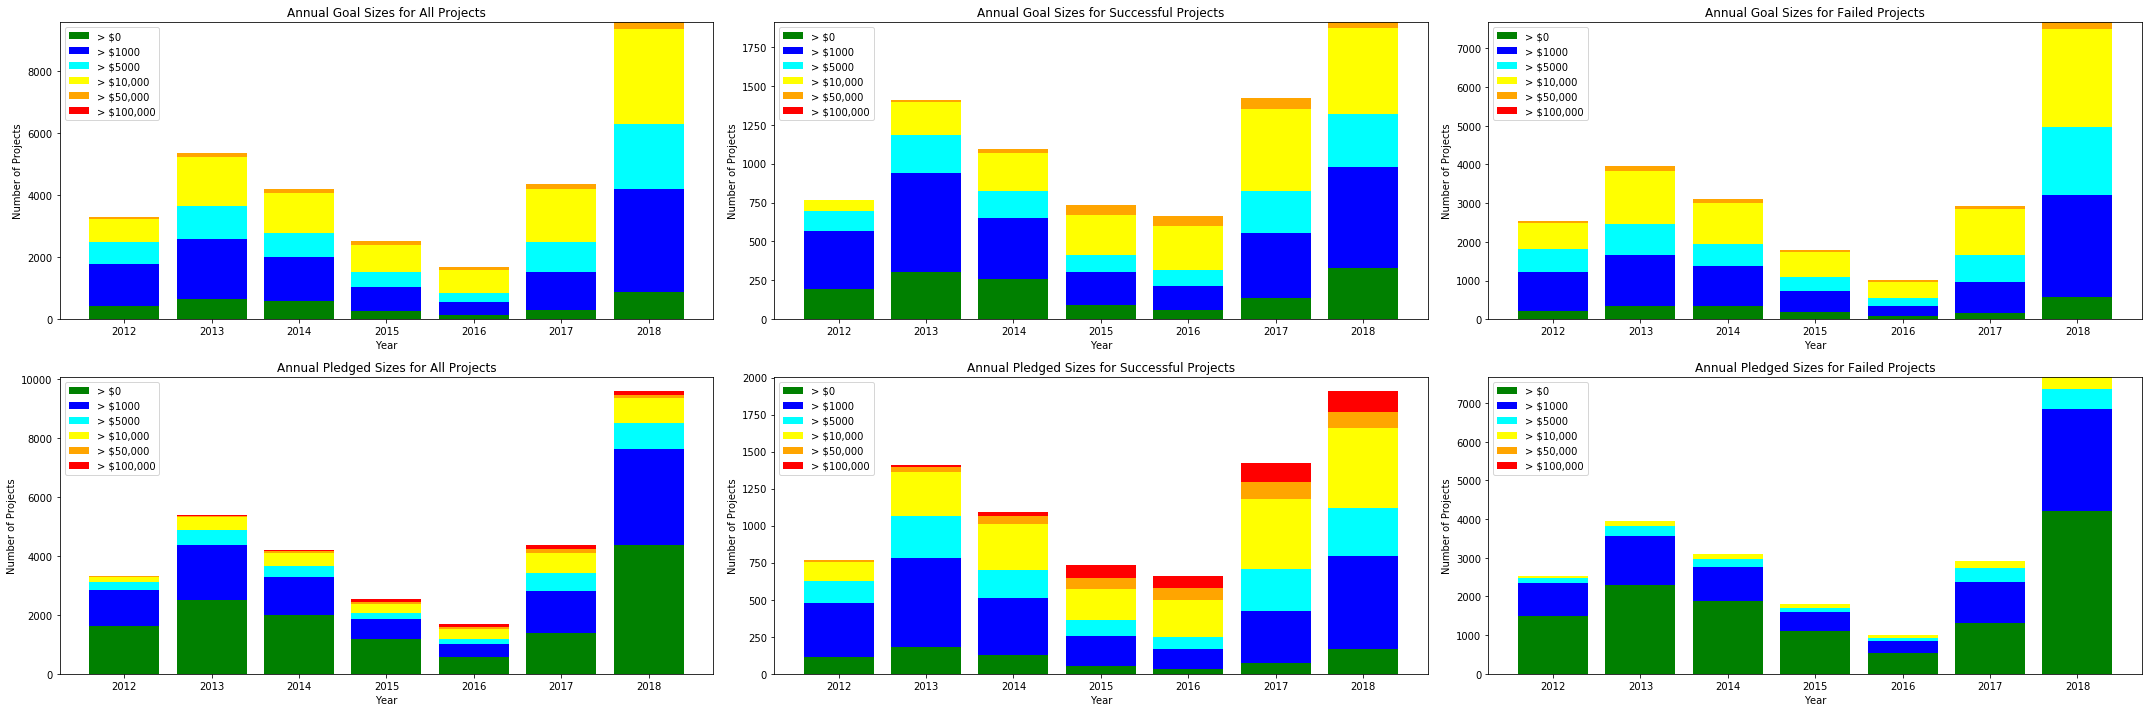

In [40]:
### TESTING DISTRIBUTION OF GOAL SIZES

df_lst = [df2_all, df2_success, df2_fail]
goal_titles = ['Annual Goal Sizes for All Projects', 'Annual Goal Sizes for Successful Projects', 'Annual Goal Sizes for Failed Projects']
pledged_titles = ['Annual Pledged Sizes for All Projects', 'Annual Pledged Sizes for Successful Projects', 'Annual Pledged Sizes for Failed Projects']

fig = plt.figure(figsize = (30,10))

for idx in range(len(df_lst)):
    curr_df = df_lst[idx]
    years = list(curr_df['Created At Year'].drop_duplicates())
    years.sort()
    years = years[1:len(years)]

    new_dict = {}
    new_dict_0 = {}
    new_dict_1000 = {}
    new_dict_5000 = {}
    new_dict_10000 = {}
    new_dict_50000 = {}
    new_dict_100000 = {}
    # build dictionaries by putting project in corresponding range
    for i in years:
        temp = curr_df.loc[curr_df['Created At Year'] == i]
        new_dict[i] = list(temp['goal']) # extract goal sizes from each year
        new_dict_0[i] = 0
        new_dict_1000[i] = 0
        new_dict_5000[i] = 0
        new_dict_10000[i] = 0
        new_dict_50000[i] = 0
        new_dict_100000[i] = 0    
    for k, v in new_dict.items():
        for goal in v:
            if goal > 0:
                new_dict_0[k] += 1
            if goal > 1000:
                new_dict_1000[k] += 1
            if goal > 5000:
                new_dict_5000[k] += 1
            if goal > 10000:
                new_dict_10000[k] += 1
            if goal > 50000:
                new_dict_50000[k] += 1
            if goal > 100000:
                new_dict_100000[k] += 1

    lst_0 = np.zeros([len(years)], dtype=int)
    lst_1000 = np.zeros([len(years)], dtype=int)
    lst_5000 = np.zeros([len(years)], dtype=int)
    lst_10000 = np.zeros([len(years)], dtype=int)
    lst_50000 = np.zeros([len(years)], dtype=int)
    lst_100000 = np.zeros([len(years)], dtype=int)
    for i in range(len(years)):
        lst_0[i] = new_dict_0[years[i]] - new_dict_1000[years[i]]
        lst_1000[i] = new_dict_1000[years[i]] - new_dict_5000[years[i]]
        lst_5000[i] = new_dict_5000[years[i]] - new_dict_10000[years[i]]
        lst_10000[i] = new_dict_10000[years[i]] - new_dict_50000[years[i]]
        lst_50000[i] = new_dict_50000[years[i]] - new_dict_100000[years[i]]
        lst_100000[i] = new_dict_100000[years[i]]

    ind = np.arange(len(years))
    plt.subplot(2, 3, idx+1)
    plt.bar(ind, lst_0, width=0.8, label='> $0', color='green')
    plt.bar(ind, lst_1000, width=0.8, label='> $1000', color='blue', bottom=lst_0)
    plt.bar(ind, lst_5000, width=0.8, label='> $5000', color='cyan', bottom=lst_0+lst_1000)
    plt.bar(ind, lst_10000, width=0.8, label='> $10,000', color='yellow', bottom=lst_0+lst_1000+lst_5000)
    plt.bar(ind, lst_50000, width=0.8, label='> $50,000', color='orange', bottom=lst_0+lst_1000+lst_5000+lst_10000)
    plt.bar(ind, lst_100000, width=0.8, label='> $100,000', color='red', bottom=lst_0+lst_1000+lst_5000+lst_10000+lst_50000)

    plt.xticks(ind, years)
    plt.ylabel("Number of Projects")
    plt.xlabel("Year")
    plt.legend(loc="upper left")
    plt.title(goal_titles[idx])
    
for idx in range(len(df_lst)):
    curr_df = df_lst[idx]
    years = list(curr_df['Created At Year'].drop_duplicates())
    years.sort()
    years = years[1:len(years)]
    
    new_dict = {}
    new_dict_0 = {}
    new_dict_1000 = {}
    new_dict_5000 = {}
    new_dict_10000 = {}
    new_dict_50000 = {}
    new_dict_100000 = {}
    # build dictionaries by putting project in corresponding range
    for i in years:
        temp = curr_df.loc[curr_df['Created At Year'] == i]
        new_dict[i] = list(temp['usd_pledged']) # extract goal sizes from each year
        new_dict_0[i] = 0
        new_dict_1000[i] = 0
        new_dict_5000[i] = 0
        new_dict_10000[i] = 0
        new_dict_50000[i] = 0
        new_dict_100000[i] = 0    
    for k, v in new_dict.items():
        for goal in v:
            if goal > 0:
                new_dict_0[k] += 1
            if goal > 1000:
                new_dict_1000[k] += 1
            if goal > 5000:
                new_dict_5000[k] += 1
            if goal > 10000:
                new_dict_10000[k] += 1
            if goal > 50000:
                new_dict_50000[k] += 1
            if goal > 100000:
                new_dict_100000[k] += 1

    lst_0 = np.zeros([len(years)], dtype=int)
    lst_1000 = np.zeros([len(years)], dtype=int)
    lst_5000 = np.zeros([len(years)], dtype=int)
    lst_10000 = np.zeros([len(years)], dtype=int)
    lst_50000 = np.zeros([len(years)], dtype=int)
    lst_100000 = np.zeros([len(years)], dtype=int)
    for i in range(len(years)):
        lst_0[i] = new_dict_0[years[i]] - new_dict_1000[years[i]]
        lst_1000[i] = new_dict_1000[years[i]] - new_dict_5000[years[i]]
        lst_5000[i] = new_dict_5000[years[i]] - new_dict_10000[years[i]]
        lst_10000[i] = new_dict_10000[years[i]] - new_dict_50000[years[i]]
        lst_50000[i] = new_dict_50000[years[i]] - new_dict_100000[years[i]]
        lst_100000[i] = new_dict_100000[years[i]]

    ind = np.arange(len(years))
    plt.subplot(2, 3, idx+4)
    plt.bar(ind, lst_0, width=0.8, label='> $0', color='green')
    plt.bar(ind, lst_1000, width=0.8, label='> $1000', color='blue', bottom=lst_0)
    plt.bar(ind, lst_5000, width=0.8, label='> $5000', color='cyan', bottom=lst_0+lst_1000)
    plt.bar(ind, lst_10000, width=0.8, label='> $10,000', color='yellow', bottom=lst_0+lst_1000+lst_5000)
    plt.bar(ind, lst_50000, width=0.8, label='> $50,000', color='orange', bottom=lst_0+lst_1000+lst_5000+lst_10000)
    plt.bar(ind, lst_100000, width=0.8, label='> $100,000', color='red', bottom=lst_0+lst_1000+lst_5000+lst_10000+lst_50000)

    plt.xticks(ind, years)
    plt.ylabel("Number of Projects")
    plt.xlabel("Year")
    plt.legend(loc="upper left")
    plt.title(pledged_titles[idx])
    
    print(lst_100000)

plt.tight_layout()
plt.show()

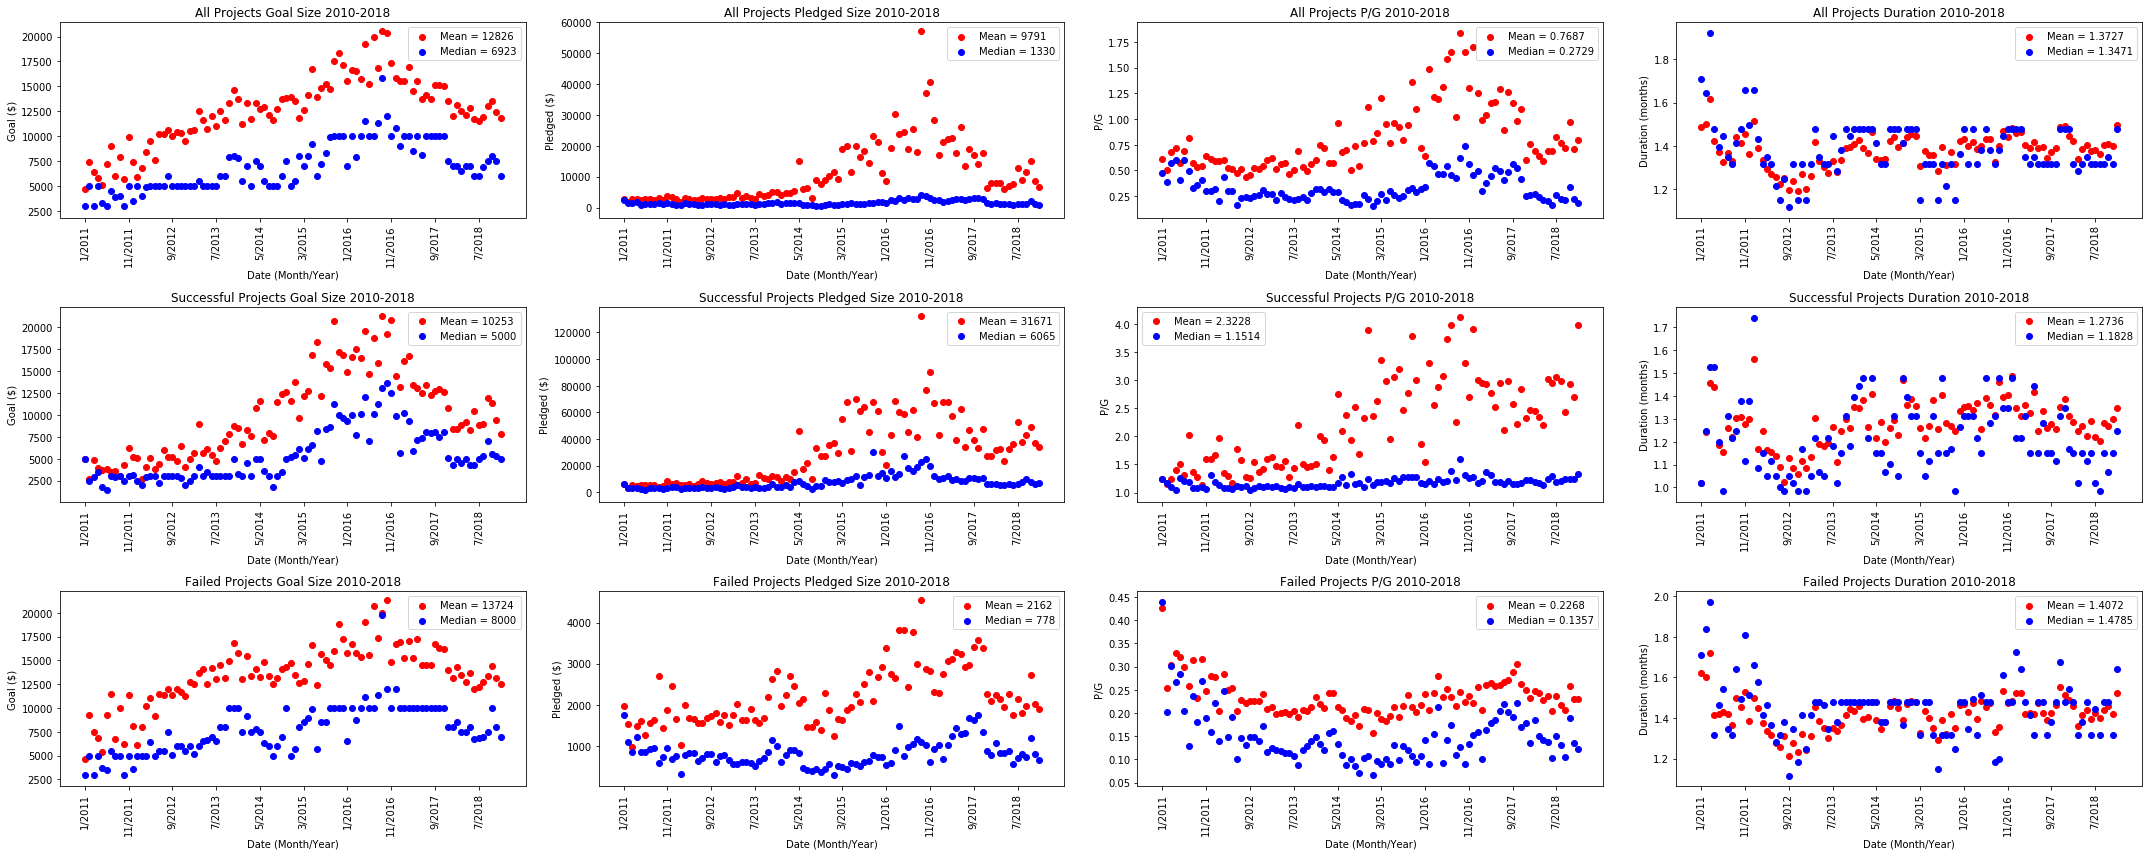

In [41]:
### GOAL AND PLEDGED
### (Note: if division by zero error, run previous cell)
    
### ALL PROJECTS

# key: month/year
# value: goal/pledged size
all_months = list(ordered_month_allprojects.keys())
month_goal_dict = {}
month_pledged_dict = {}
month_pg_dict = {}
month_duration_dict = {}
for i in all_months:
    temp = df2_all.loc[df2_all['Created At Month/Year'] == i]
    month_goal_dict[i] = np.array(temp['goal'])
    month_pledged_dict[i] = np.array(temp['usd_pledged'])
    month_pg_dict[i] = month_pledged_dict[i] / month_goal_dict[i]
    month_duration_dict[i] = np.array(temp['duration'])

# key: month/year
# value: mean/median goal/pledged
month_meangoal_dict = {} # monthly mean goal size
month_mediangoal_dict = {} # monthly median goal size
for k,v in month_goal_dict.items():
    month_meangoal_dict[k] = sum(v)/ len(v)
    month_mediangoal_dict[k] = statistics.median(v)
month_meanpledged_dict = {} # monthly mean pledged size
month_medianpledged_dict = {} # monthly median pledged size
for k,v in month_pledged_dict.items():
    month_meanpledged_dict[k] = sum(v)/ len(v)
    month_medianpledged_dict[k] = statistics.median(v)
month_meanpg_dict = {} # monthly mean p/g
month_medianpg_dict = {} # monthly median p/g
for k,v in month_pg_dict.items():
    month_meanpg_dict[k] = sum(v)/ len(v)
    month_medianpg_dict[k] = statistics.median(v)
month_meanduration_dict = {} # monthly mean duration
month_medianduration_dict = {} # monthly median duration
for k,v in month_duration_dict.items():
    month_meanduration_dict[k] = sum(v)/ len(v)
    month_medianduration_dict[k] = statistics.median(v)

# sort dictionary by time for mean/median dictionaries
ordered_month_meangoal_dict = dict(sorted(month_meangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_mediangoal_dict = dict(sorted(month_mediangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanpledged_dict = dict(sorted(month_meanpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianpledged_dict = dict(sorted(month_medianpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanpg_dict = dict(sorted(month_meanpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianpg_dict = dict(sorted(month_medianpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanduration_dict = dict(sorted(month_meanduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianduration_dict = dict(sorted(month_medianduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))

# PLOT GOAL SIZE
fig = plt.figure(figsize=(30, 12))
plt.subplot(3, 4, 1)
plt.scatter(list(ordered_month_meangoal_dict.keys()), list(ordered_month_meangoal_dict.values()), color = 'red')
plt.scatter(list(ordered_month_mediangoal_dict.keys()), list(ordered_month_mediangoal_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Goal ($)')

mean_goal = sum(df2_all['goal']) / len(df2_all['goal'])
median_goal = statistics.median(df2_all['goal'])
plt.legend(['Mean = ' + str(round(mean_goal)), 
            'Median = ' + str(round(median_goal))])
plt.title('All Projects Goal Size 2010-2018')

# PLOT PLEDGED SIZE
plt.subplot(3, 4, 2)
plt.scatter(list(ordered_month_meanpledged_dict.keys()), list(ordered_month_meanpledged_dict.values()), color = 'red')
plt.scatter(list(ordered_month_medianpledged_dict.keys()), list(ordered_month_medianpledged_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Pledged ($)')

mean_pledged = sum(df2_all['usd_pledged']) / len(df2_all['usd_pledged'])
median_pledged = statistics.median(df2_all['usd_pledged'])
plt.legend(['Mean = ' + str(round(mean_pledged)), 
            'Median = ' + str(round(median_pledged))])
plt.title('All Projects Pledged Size 2010-2018')

# PLOT P/G SIZE
plt.subplot(3, 4, 3)
plt.scatter(list(ordered_month_meanpg_dict.keys()), list(ordered_month_meanpg_dict.values()), color = 'red')
plt.scatter(list(ordered_month_medianpg_dict.keys()), list(ordered_month_medianpg_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('P/G')

mean_pg = sum(df2_all['P/G']) / len(df2_all['P/G'])
median_pg = statistics.median(df2_all['P/G'])
plt.legend(['Mean = ' + str(round(mean_pg, 4)), 
            'Median = ' + str(round(median_pg, 4))])
plt.title('All Projects P/G 2010-2018')

# PLOT DURATION SIZE
plt.subplot(3, 4, 4)
plt.scatter(list(ordered_month_meanduration_dict.keys()), list(ordered_month_meanduration_dict.values()), color = 'red')
plt.scatter(list(ordered_month_medianduration_dict.keys()), list(ordered_month_medianduration_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Duration (months)')

mean_duration = sum(df2_all['duration']) / len(df2_all['duration'])
median_duration = statistics.median(df2_all['duration'])
plt.legend(['Mean = ' + str(round(mean_duration, 4)), 
            'Median = ' + str(round(median_duration, 4))])
plt.title('All Projects Duration 2010-2018')


# --------------------------------------------------
# --------------------------------------------------

### SUCCESSFUL PROJECTS

# key: month/year
# value: goal/pledged size
success_months = list(ordered_month_successprojects.keys())
success_month_goal_dict = {}
success_month_pledged_dict = {}
success_month_pg_dict = {}
success_month_duration_dict = {}
for i in success_months:
    temp = df2_success.loc[df2_success['Created At Month/Year'] == i]
    success_month_goal_dict[i] = np.array(temp['goal'])
    success_month_pledged_dict[i] = np.array(temp['usd_pledged'])
    success_month_pg_dict[i] = success_month_pledged_dict[i] / success_month_goal_dict[i]
    success_month_duration_dict[i] = np.array(temp['duration'])

# key: month/year
# value: mean/median goal/pledged
success_month_meangoal_dict = {} # monthly mean goal size
success_month_mediangoal_dict = {} # monthly median goal size
for k,v in success_month_goal_dict.items():
    success_month_meangoal_dict[k] = sum(v)/ len(v)
    success_month_mediangoal_dict[k] = statistics.median(v)
success_month_meanpledged_dict = {} # monthly mean pledged size
success_month_medianpledged_dict = {} # monthly median pledged size
for k,v in success_month_pledged_dict.items():
    success_month_meanpledged_dict[k] = sum(v)/ len(v)
    success_month_medianpledged_dict[k] = statistics.median(v)
success_month_meanpg_dict = {} # monthly mean p/g
success_month_medianpg_dict = {} # monthly median p/g
for k,v in success_month_pg_dict.items():
    success_month_meanpg_dict[k] = sum(v)/ len(v)
    success_month_medianpg_dict[k] = statistics.median(v)
success_month_meanduration_dict = {} # monthly mean duration
success_month_medianduration_dict = {} # monthly median duration
for k,v in success_month_duration_dict.items():
    success_month_meanduration_dict[k] = sum(v)/ len(v)
    success_month_medianduration_dict[k] = statistics.median(v)
    
# sort dictionary by time for mean/median dictionaries
success_ordered_month_meangoal_dict = dict(sorted(success_month_meangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_mediangoal_dict = dict(sorted(success_month_mediangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanpledged_dict = dict(sorted(success_month_meanpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianpledged_dict = dict(sorted(success_month_medianpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanpg_dict = dict(sorted(success_month_meanpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianpg_dict = dict(sorted(success_month_medianpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanduration_dict = dict(sorted(success_month_meanduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianduration_dict = dict(sorted(success_month_medianduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))

# PLOT GOAL SIZE
plt.subplot(3, 4, 5)
plt.scatter(list(success_ordered_month_meangoal_dict.keys()), list(success_ordered_month_meangoal_dict.values()), color = 'red')
plt.scatter(list(success_ordered_month_mediangoal_dict.keys()), list(success_ordered_month_mediangoal_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Goal ($)')

success_mean_goal = sum(df2_success['goal']) / len(df2_success['goal'])
success_median_goal = statistics.median(df2_success['goal'])
plt.legend(['Mean = ' + str(round(success_mean_goal)), 
            'Median = ' + str(round(success_median_goal))])
plt.title('Successful Projects Goal Size 2010-2018')

# PLOT PLEDGED SIZE
plt.subplot(3, 4, 6)
plt.scatter(list(success_ordered_month_meanpledged_dict.keys()), list(success_ordered_month_meanpledged_dict.values()), color = 'red')
plt.scatter(list(success_ordered_month_medianpledged_dict.keys()), list(success_ordered_month_medianpledged_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Pledged ($)')

success_mean_pledged = sum(df2_success['usd_pledged']) / len(df2_success['usd_pledged'])
success_median_pledged = statistics.median(df2_success['usd_pledged'])
plt.legend(['Mean = ' + str(round(success_mean_pledged)), 
            'Median = ' + str(round(success_median_pledged))])
plt.title('Successful Projects Pledged Size 2010-2018')

# PLOT P/G SIZE
plt.subplot(3, 4, 7)
plt.scatter(list(success_ordered_month_meanpg_dict.keys()), list(success_ordered_month_meanpg_dict.values()), color = 'red')
plt.scatter(list(success_ordered_month_medianpg_dict.keys()), list(success_ordered_month_medianpg_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('P/G')

success_mean_pg = sum(df2_success['P/G']) / len(df2_success['P/G'])
success_median_pg = statistics.median(df2_success['P/G'])
plt.legend(['Mean = ' + str(round(success_mean_pg, 4)), 
            'Median = ' + str(round(success_median_pg, 4))])
plt.title('Successful Projects P/G 2010-2018')

# PLOT DURATION SIZE
plt.subplot(3, 4, 8)
plt.scatter(list(success_ordered_month_meanduration_dict.keys()), list(success_ordered_month_meanduration_dict.values()), color = 'red')
plt.scatter(list(success_ordered_month_medianduration_dict.keys()), list(success_ordered_month_medianduration_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Duration (months)')

success_mean_duration = sum(df2_success['duration']) / len(df2_success['duration'])
success_median_duration = statistics.median(df2_success['duration'])
plt.legend(['Mean = ' + str(round(success_mean_duration, 4)), 
            'Median = ' + str(round(success_median_duration, 4))])
plt.title('Successful Projects Duration 2010-2018')

# --------------------------------------------------
# --------------------------------------------------

### NON-SUCCESSFUL PROJECTS

# key: month/year
# value: goal/pledged size
fail_months = list(ordered_month_failprojects.keys())
fail_month_goal_dict = {}
fail_month_pledged_dict = {}
fail_month_pg_dict = {}
fail_month_duration_dict = {}
for i in fail_months:
    temp = df2_fail.loc[df2_fail['Created At Month/Year'] == i]
    fail_month_goal_dict[i] = np.array(temp['goal'])
    fail_month_pledged_dict[i] = np.array(temp['usd_pledged'])
    fail_month_pg_dict[i] = fail_month_pledged_dict[i] / fail_month_goal_dict[i]
    fail_month_duration_dict[i] = np.array(temp['duration'])

# key: month/year
# value: mean/median goal/pledged
fail_month_meangoal_dict = {} # monthly mean goal size
fail_month_mediangoal_dict = {} # monthly median goal size
for k,v in fail_month_goal_dict.items():
    fail_month_meangoal_dict[k] = sum(v)/ len(v)
    fail_month_mediangoal_dict[k] = statistics.median(v)
fail_month_meanpledged_dict = {} # monthly mean pledged size
fail_month_medianpledged_dict = {} # monthly median pledged size
for k,v in fail_month_pledged_dict.items():
    fail_month_meanpledged_dict[k] = sum(v)/ len(v)
    fail_month_medianpledged_dict[k] = statistics.median(v)
fail_month_meanpg_dict = {} # monthly mean p/g
fail_month_medianpg_dict = {} # monthly median p/g
for k,v in fail_month_pg_dict.items():
    fail_month_meanpg_dict[k] = sum(v)/ len(v)
    fail_month_medianpg_dict[k] = statistics.median(v)
fail_month_meanduration_dict = {} # monthly mean duration
fail_month_medianduration_dict = {} # monthly median duration
for k,v in fail_month_duration_dict.items():
    fail_month_meanduration_dict[k] = sum(v)/ len(v)
    fail_month_medianduration_dict[k] = statistics.median(v)

# sort dictionary by time for mean/median dictionaries
fail_ordered_month_meangoal_dict = dict(sorted(fail_month_meangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_mediangoal_dict = dict(sorted(fail_month_mediangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanpledged_dict = dict(sorted(fail_month_meanpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianpledged_dict = dict(sorted(fail_month_medianpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanpg_dict = dict(sorted(fail_month_meanpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianpg_dict = dict(sorted(fail_month_medianpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanduration_dict = dict(sorted(fail_month_meanduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianduration_dict = dict(sorted(fail_month_medianduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))

# PLOT GOAL SIZE
plt.subplot(3, 4, 9)
plt.scatter(list(fail_ordered_month_meangoal_dict.keys()), list(fail_ordered_month_meangoal_dict.values()), color = 'red')
plt.scatter(list(fail_ordered_month_mediangoal_dict.keys()), list(fail_ordered_month_mediangoal_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Goal ($)')

fail_mean_goal = sum(df2_fail['goal']) / len(df2_fail['goal'])
fail_median_goal = statistics.median(df2_fail['goal'])
plt.legend(['Mean = ' + str(round(fail_mean_goal)), 
            'Median = ' + str(round(fail_median_goal))])
plt.title('Failed Projects Goal Size 2010-2018')

# PLOT PLEDGED SIZE
plt.subplot(3, 4, 10)
plt.scatter(list(fail_ordered_month_meanpledged_dict.keys()), list(fail_ordered_month_meanpledged_dict.values()), color = 'red')
plt.scatter(list(fail_ordered_month_medianpledged_dict.keys()), list(fail_ordered_month_medianpledged_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Pledged ($)')

fail_mean_pledged = sum(df2_fail['usd_pledged']) / len(df2_fail['usd_pledged'])
fail_median_pledged = statistics.median(df2_fail['usd_pledged'])
plt.legend(['Mean = ' + str(round(fail_mean_pledged)), 
            'Median = ' + str(round(fail_median_pledged))])
plt.title('Failed Projects Pledged Size 2010-2018')

# PLOT P/G SIZE
plt.subplot(3, 4, 11)
plt.scatter(list(fail_ordered_month_meanpg_dict.keys()), list(fail_ordered_month_meanpg_dict.values()), color = 'red')
plt.scatter(list(fail_ordered_month_medianpg_dict.keys()), list(fail_ordered_month_medianpg_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('P/G')

fail_mean_pg = sum(df2_fail['P/G']) / len(df2_fail['P/G'])
fail_median_pg = statistics.median(df2_fail['P/G'])
plt.legend(['Mean = ' + str(round(fail_mean_pg, 4)), 
            'Median = ' + str(round(fail_median_pg, 4))])
plt.title('Failed Projects P/G 2010-2018')

# PLOT DURATION SIZE
plt.subplot(3, 4, 12)
plt.scatter(list(fail_ordered_month_meanduration_dict.keys()), list(fail_ordered_month_meanduration_dict.values()), color = 'red')
plt.scatter(list(fail_ordered_month_medianduration_dict.keys()), list(fail_ordered_month_medianduration_dict.values()), color = 'blue')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Duration (months)')

fail_mean_duration = sum(df2_fail['duration']) / len(df2_fail['duration'])
fail_median_duration = statistics.median(df2_fail['duration'])
plt.legend(['Mean = ' + str(round(fail_mean_duration, 4)), 
            'Median = ' + str(round(fail_median_duration, 4))])
plt.title('Failed Projects Duration 2010-2018')

plt.tight_layout()
plt.show()

In [42]:
import re

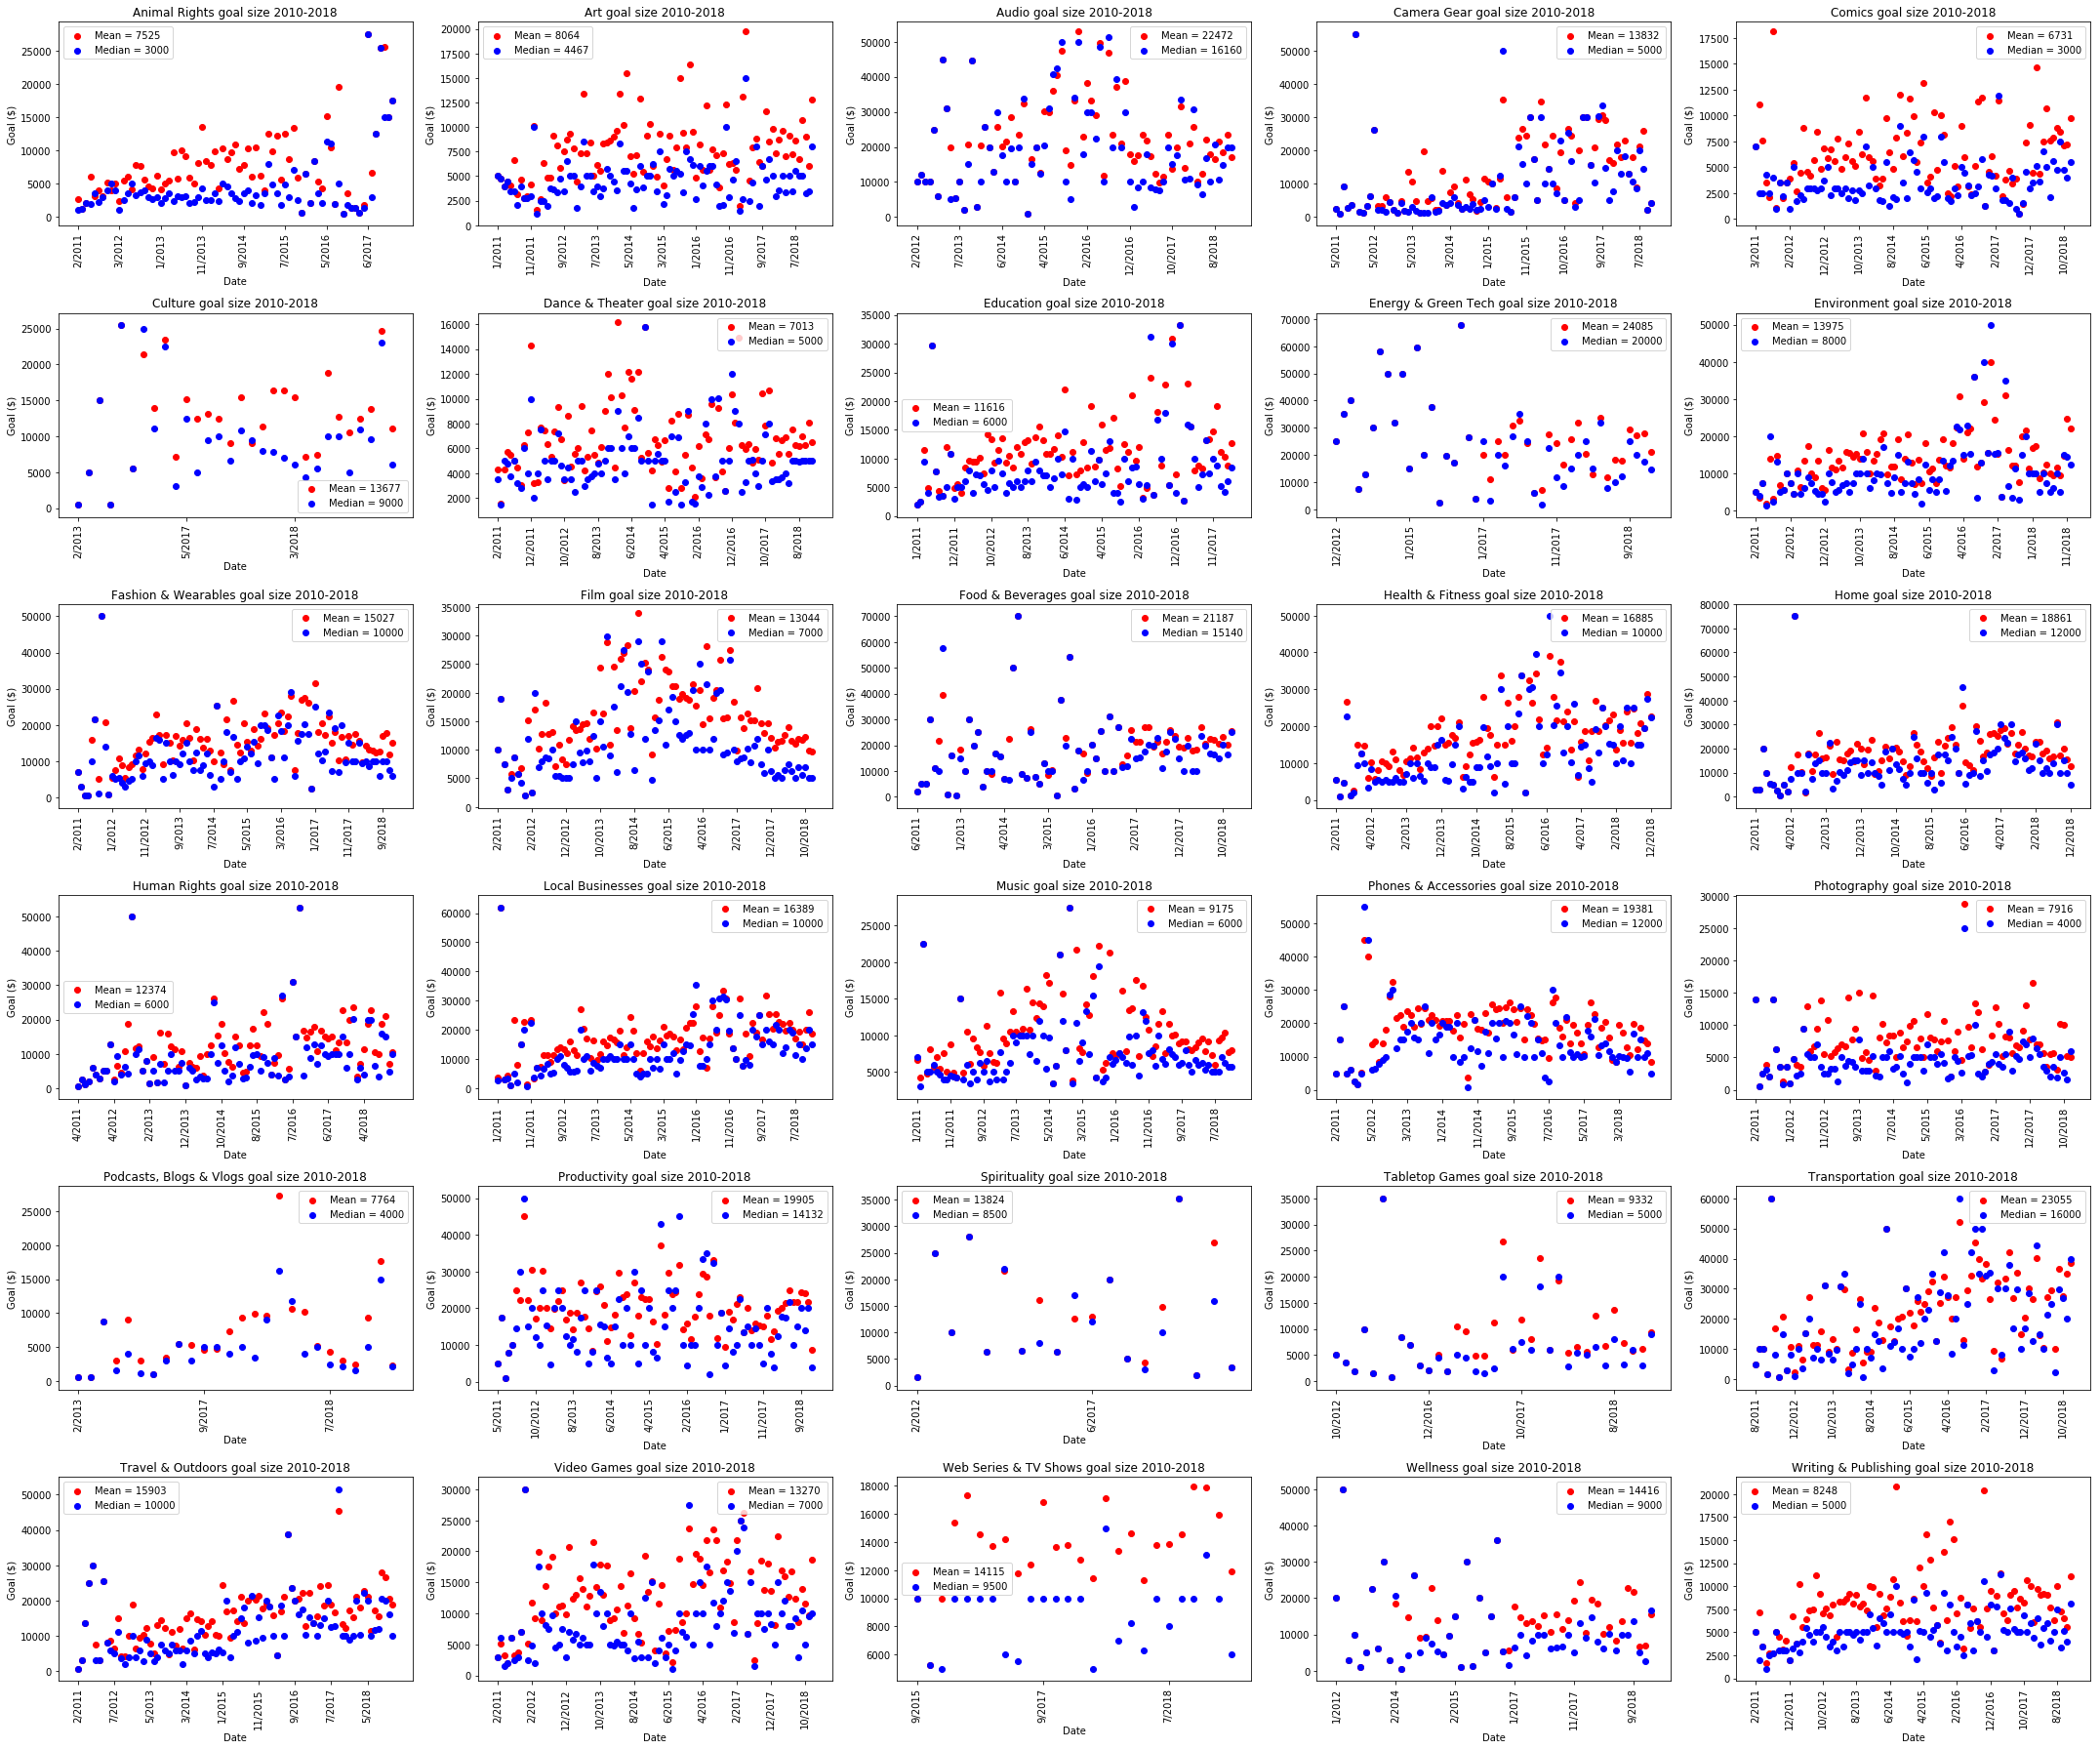

In [43]:
### GOAL SIZE PER CATEGORY

category_freq = df2_all['category'].value_counts().to_dict()
category_freq = dict(collections.OrderedDict(sorted(category_freq.items())))
category_keys = list(category_freq.keys())

fig = plt.figure(figsize=(30, 25))
for i in range(len(category_keys)):
    curr_category = category_keys[i]
    temp = df2_all.loc[df2_all['category'] == curr_category]
    category_goal_dict = {}
    
    curr_months = temp['Created At Month/Year'].value_counts().to_dict()
    for j in list(curr_months.keys()):
        temp1 = temp.loc[temp['Created At Month/Year'] == j]
        category_goal_dict[j] = temp1['goal']

    mean_category_goal_dict = {}
    median_category_goal_dict = {}
    for k,v in category_goal_dict.items():
        mean_category_goal_dict[k] = sum(v)/ len(v)
        median_category_goal_dict[k] = statistics.median(v)

    ordered_mean_category_goal_dict = dict(sorted(mean_category_goal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
    ordered_median_category_goal_dict = dict(sorted(median_category_goal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
    
    plt.subplot(6, 5, i+1)

    plt.scatter(list(ordered_mean_category_goal_dict.keys()), list(ordered_mean_category_goal_dict.values()), color = 'red')
    plt.scatter(list(ordered_median_category_goal_dict.keys()), list(ordered_median_category_goal_dict.values()), color = 'blue')
    
    locs, labs = plt.xticks() 
    plt.xticks(locs[0::10], rotation = 'vertical') 
    plt.xlabel('Date')
    plt.ylabel('Goal ($)')
    mean = sum(temp['goal']) / len(temp['goal'])
    med = statistics.median(temp['goal'])
    plt.legend(['Mean = ' + str(round(mean)), 
                'Median = ' + str(round(med))], loc = 'best')
    plt.title(curr_category + ' goal size 2010-2018')

plt.tight_layout()
plt.show()

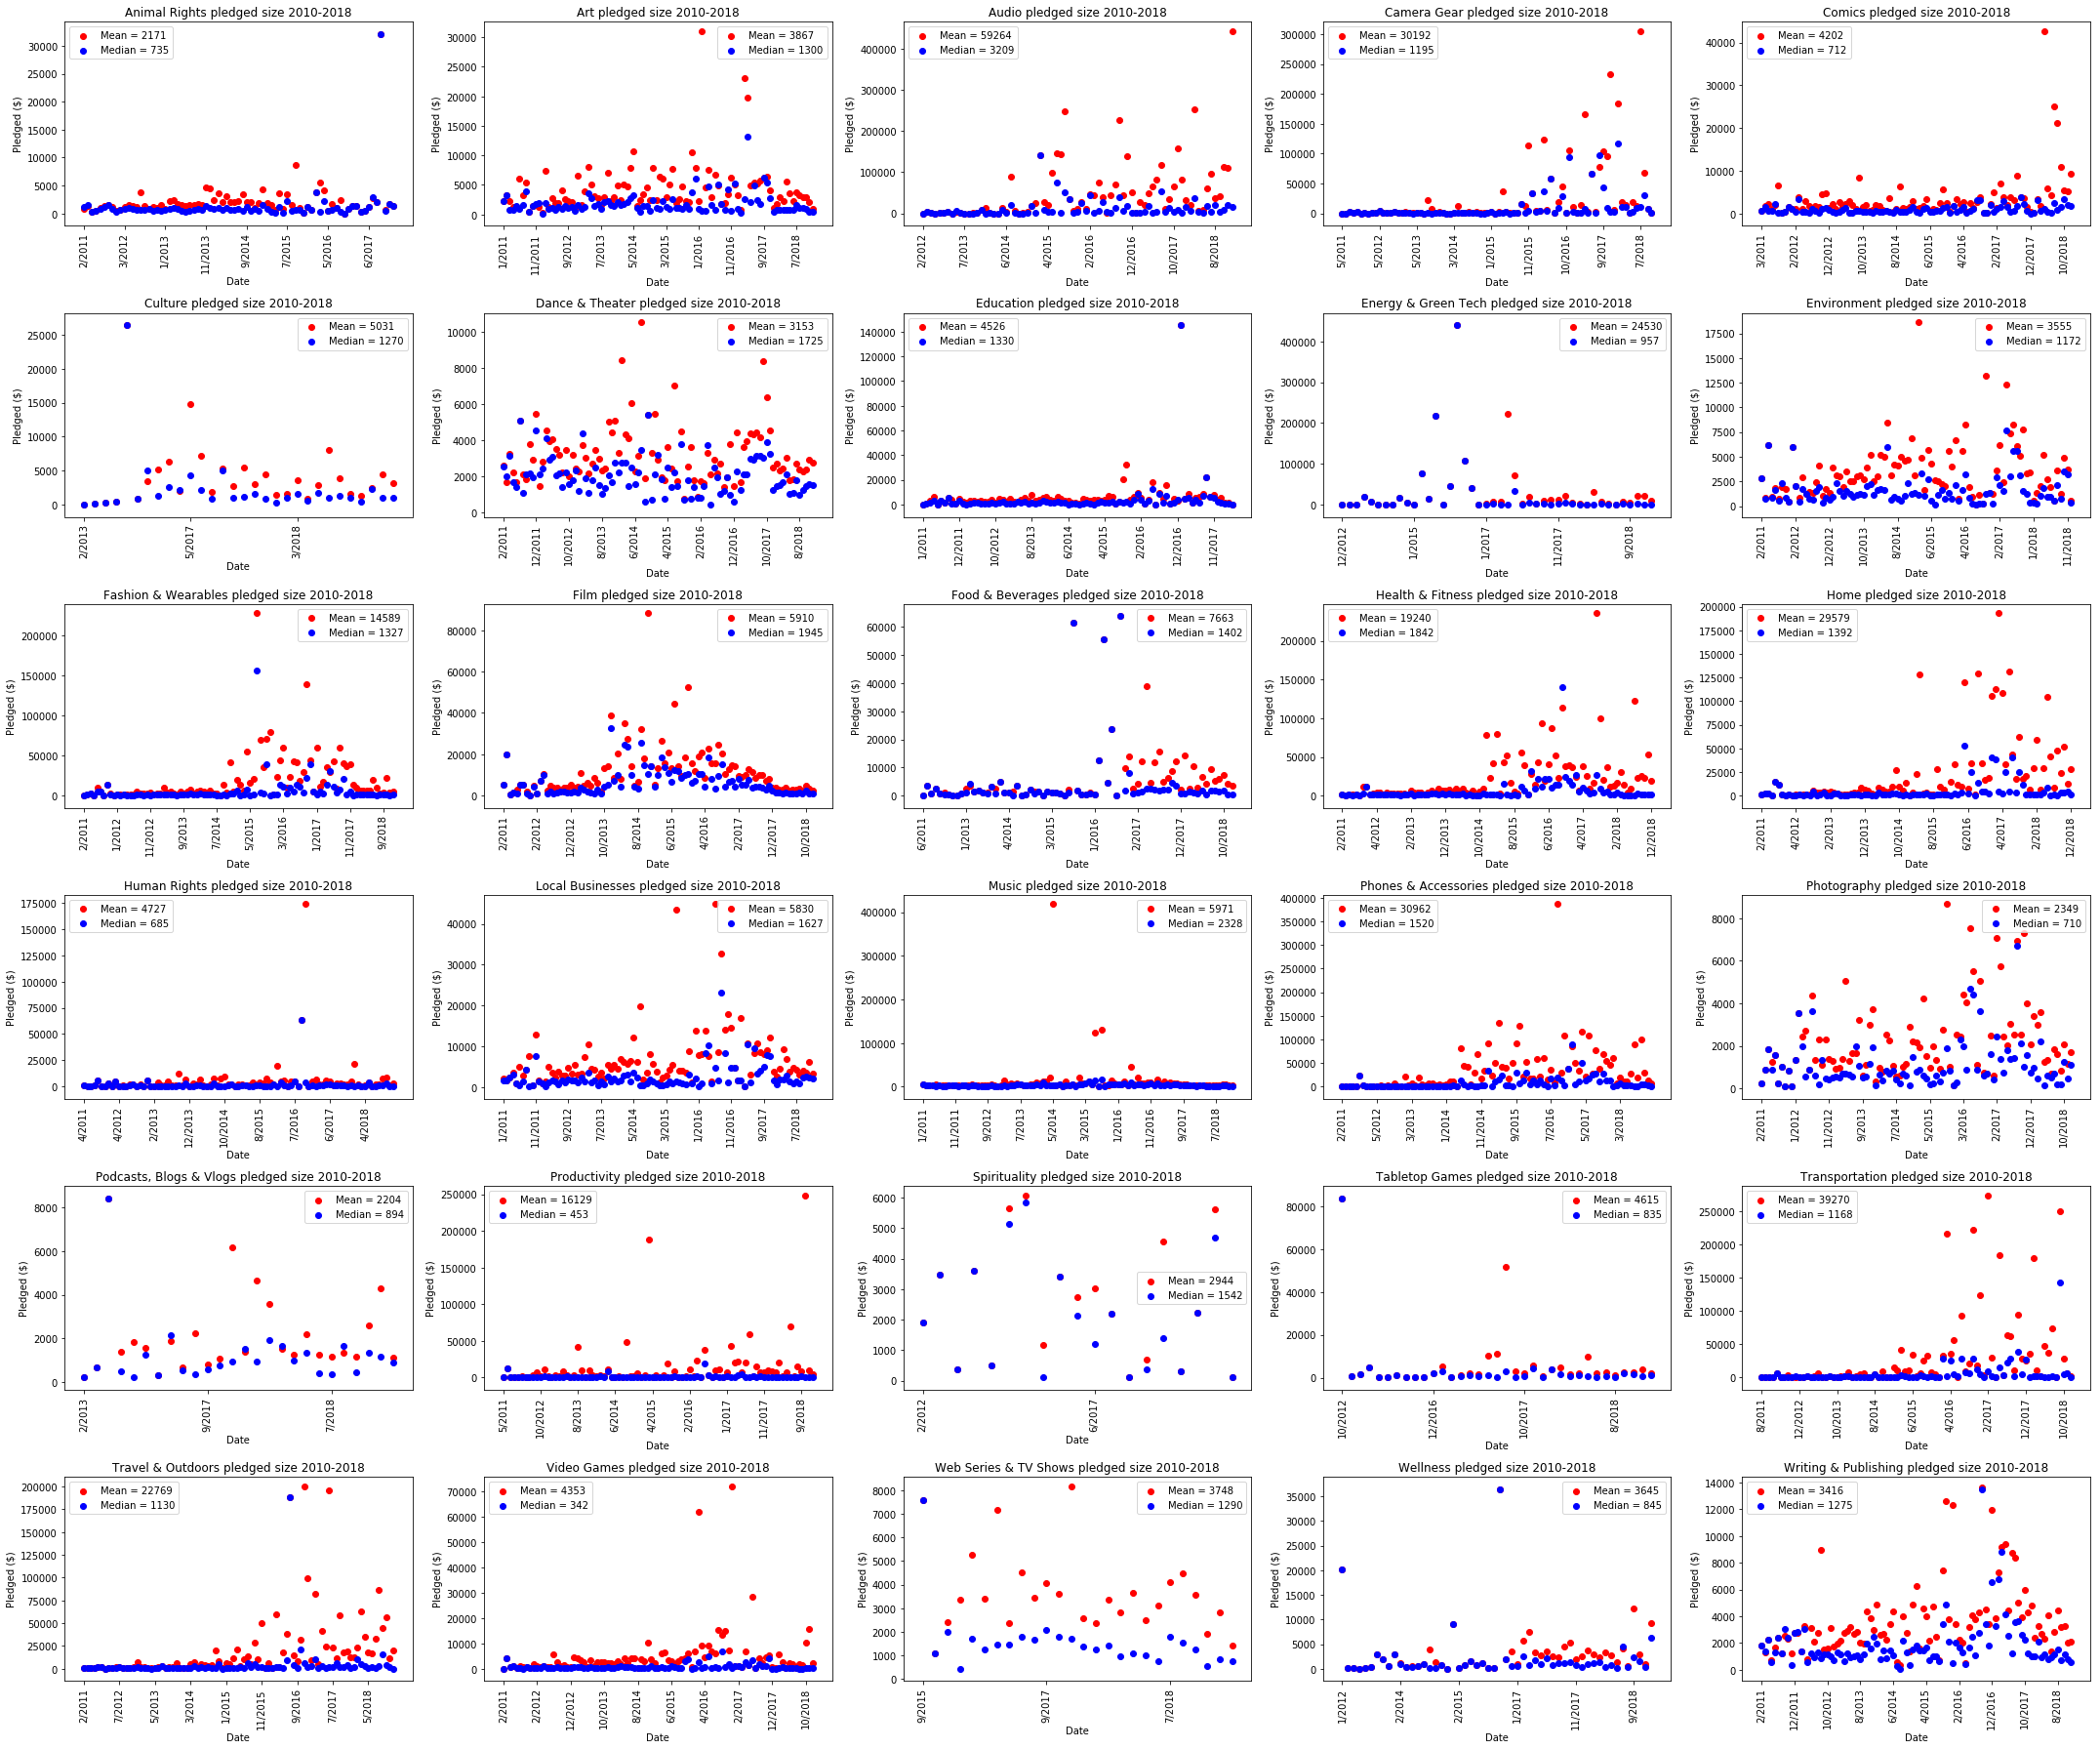

In [44]:
### PLEDGED SIZE PER CATEGORY

category_freq = df2_all['category'].value_counts().to_dict()
category_freq = dict(collections.OrderedDict(sorted(category_freq.items())))
category_keys = list(category_freq.keys())

fig = plt.figure(figsize=(30, 25))
for i in range(len(category_keys)):
    curr_category = category_keys[i]
    temp = df2_all.loc[df2_all['category'] == curr_category]
    category_pledged_dict = {}
    
    curr_months = temp['Created At Month/Year'].value_counts().to_dict()
    for j in list(curr_months.keys()):
        temp1 = temp.loc[temp['Created At Month/Year'] == j]
        category_pledged_dict[j] = temp1['usd_pledged']

    mean_category_pledged_dict = {}
    median_category_pledged_dict = {}
    for k,v in category_pledged_dict.items():
        mean_category_pledged_dict[k] = sum(v)/ len(v)
        median_category_pledged_dict[k] = statistics.median(v)

    ordered_mean_category_pledged_dict = dict(sorted(mean_category_pledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
    ordered_median_category_pledged_dict = dict(sorted(median_category_pledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
    
    plt.subplot(6, 5, i+1)

    plt.scatter(list(ordered_mean_category_pledged_dict.keys()), list(ordered_mean_category_pledged_dict.values()), color = 'red')
    plt.scatter(list(ordered_median_category_pledged_dict.keys()), list(ordered_median_category_pledged_dict.values()), color = 'blue')
    
    locs, labs = plt.xticks() 
    plt.xticks(locs[0::10], rotation = 'vertical') 
    plt.xlabel('Date')
    plt.ylabel('Pledged ($)')
    mean = sum(temp['usd_pledged']) / len(temp['usd_pledged'])
    med = statistics.median(temp['usd_pledged'])
    plt.legend(['Mean = ' + str(round(mean)), 
                'Median = ' + str(round(med))], loc = 'best')
    plt.title(curr_category + ' pledged size 2010-2018')

plt.tight_layout()
plt.show()

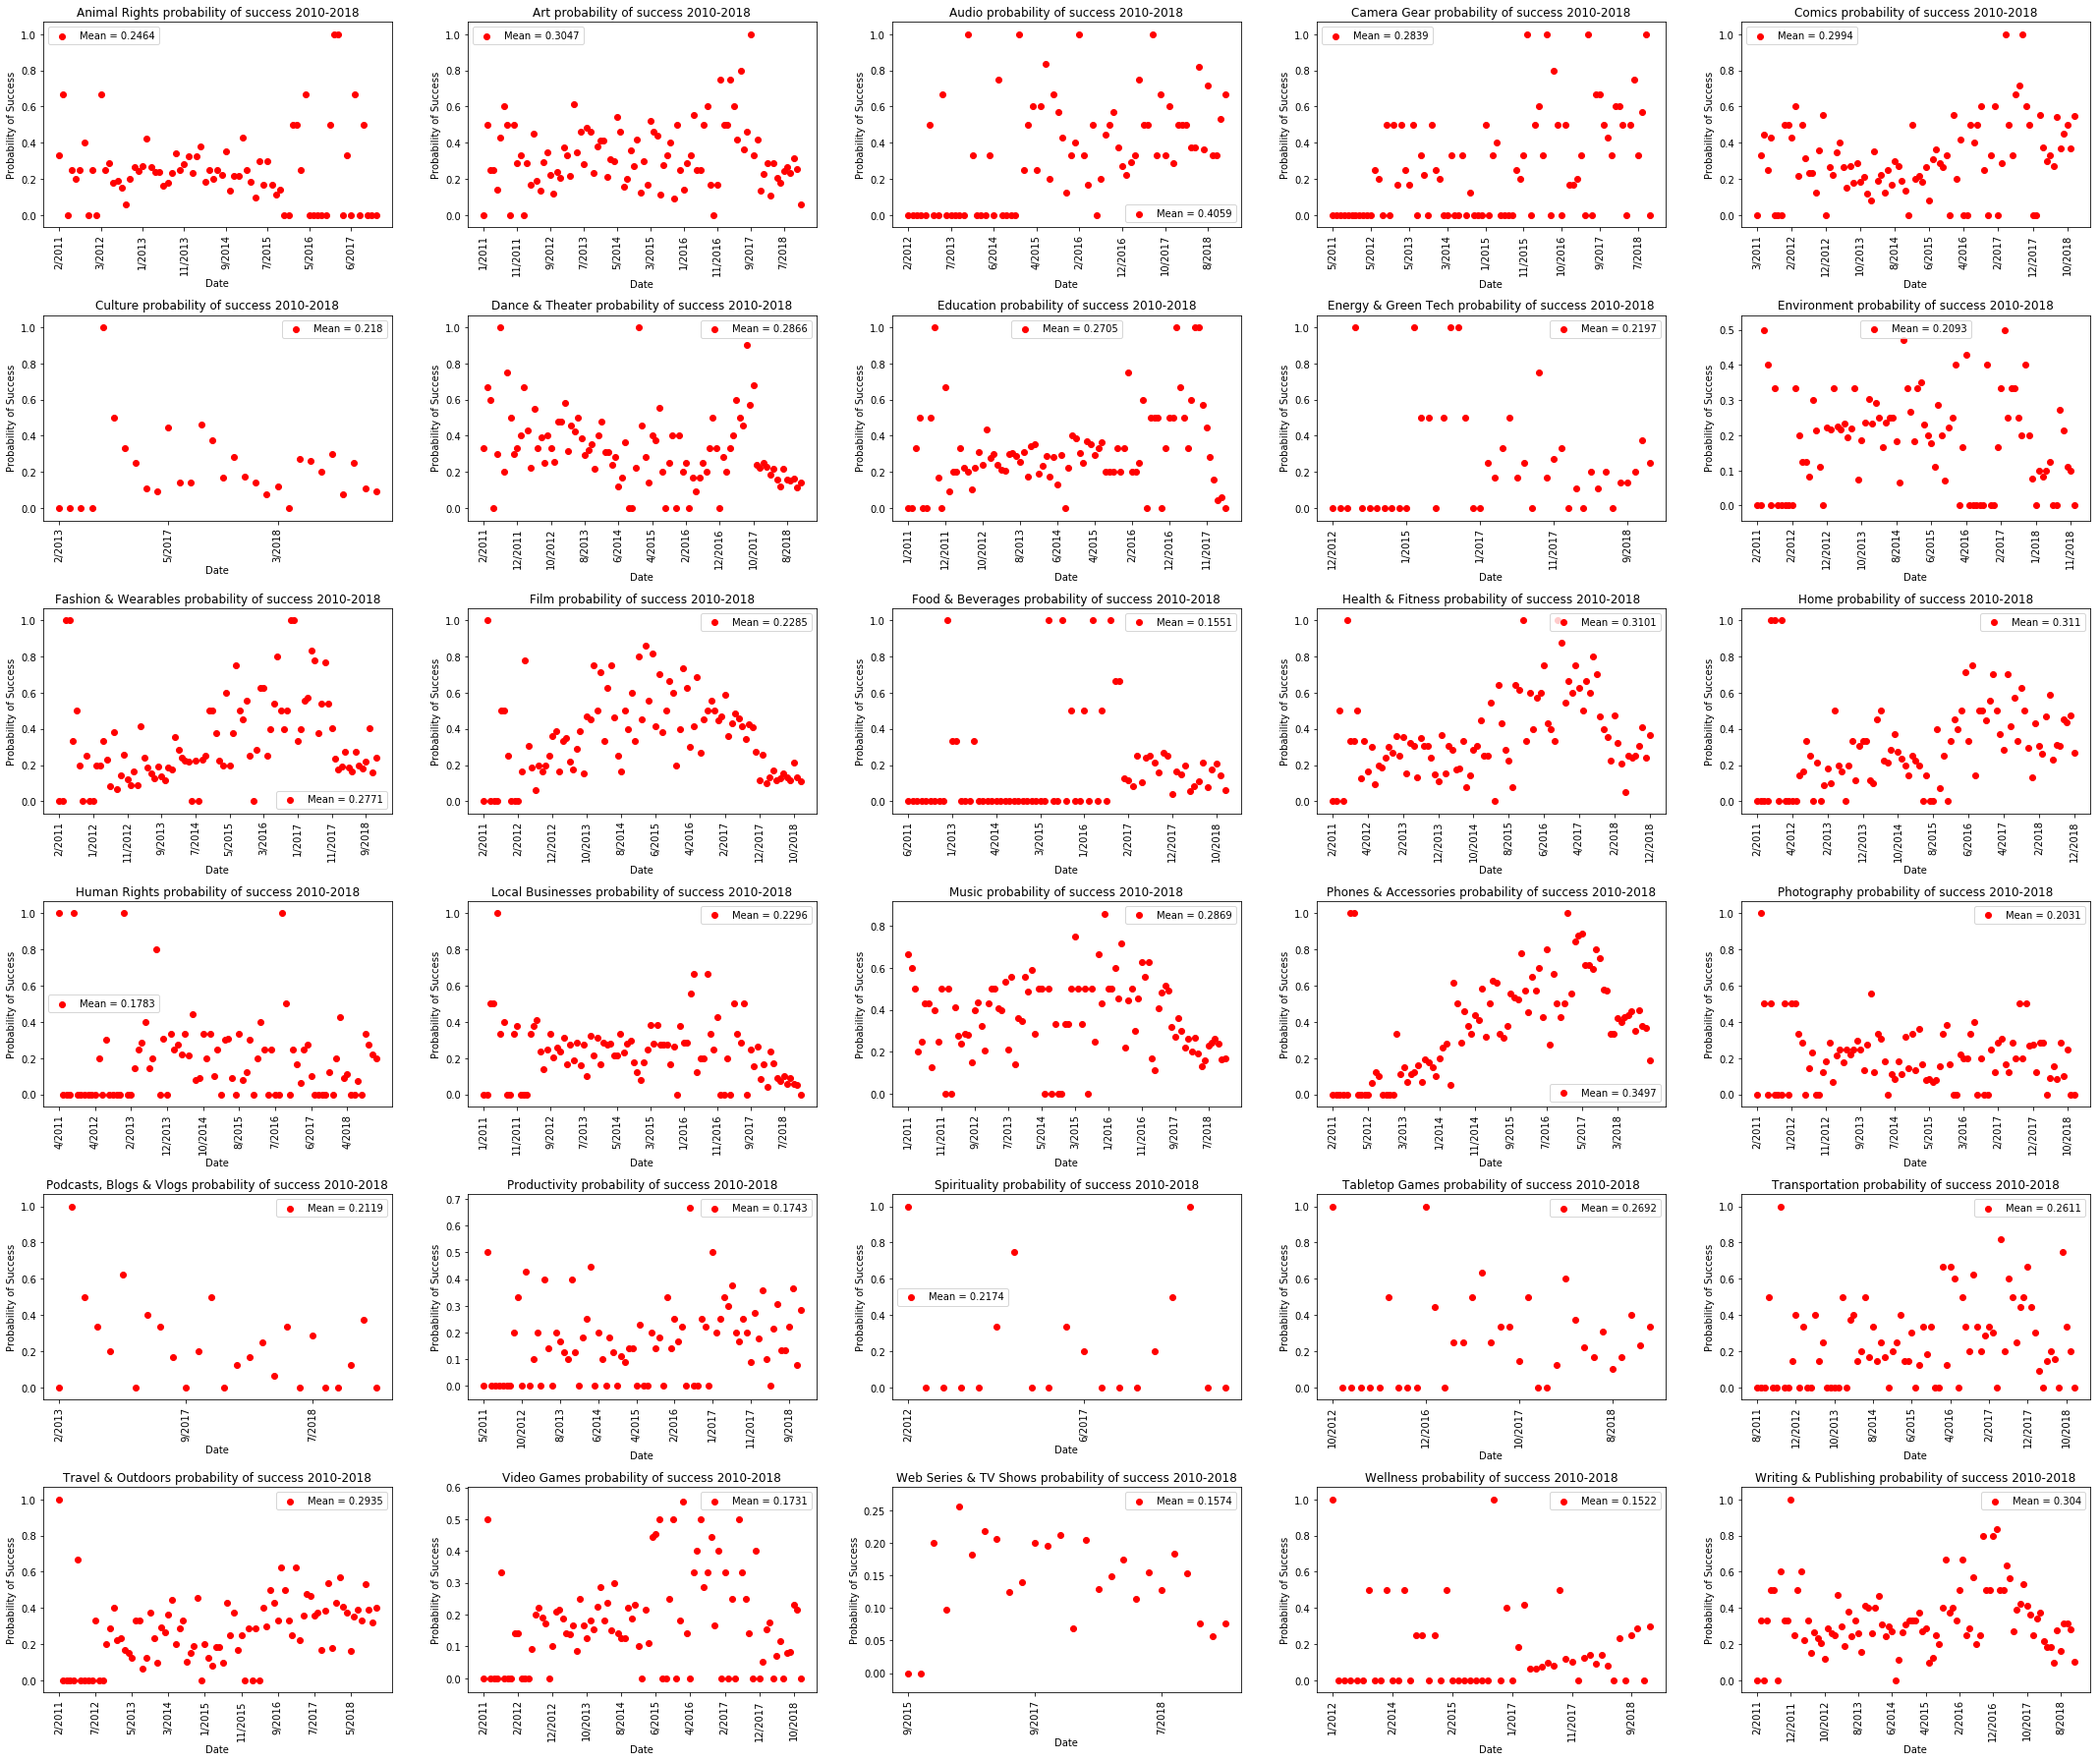

In [45]:
### PROB SUCCESS SIZE PER CATEGORY

category_freq = df2_all['category'].value_counts().to_dict()
category_freq = dict(collections.OrderedDict(sorted(category_freq.items())))
category_keys = list(category_freq.keys())

fig = plt.figure(figsize=(30, 25))
for i in range(len(category_keys)):
    curr_category = category_keys[i]
    temp = df2_all.loc[df2_all['category'] == curr_category]
    category_prob_dict = {}
    
    curr_months = temp['Created At Month/Year'].value_counts().to_dict()
    for j in list(curr_months.keys()):
        temp1 = temp.loc[temp['Created At Month/Year'] == j]
        category_prob_dict[j] = list(temp1['state'])

    mean_category_prob_dict = {}
    for k,v in category_prob_dict.items():
        sum_v = v.count('successful')
        mean_category_prob_dict[k] = sum_v / len(v)

    ordered_mean_category_prob_dict = dict(sorted(mean_category_prob_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))

    plt.subplot(6, 5, i+1)

    plt.scatter(list(ordered_mean_category_prob_dict.keys()), list(ordered_mean_category_prob_dict.values()), color = 'red')

    locs, labs = plt.xticks() 
    plt.xticks(locs[0::10], rotation = 'vertical') 
    plt.xlabel('Date')
    plt.ylabel('Probability of Success')
    sum_temp = list(temp['state']).count('successful')
    mean = sum_temp / len(temp['state'])
    plt.legend(['Mean = ' + str(round(mean, 4))], loc = 'best')
    plt.title(curr_category + ' probability of success 2010-2018')

plt.tight_layout()
plt.show()

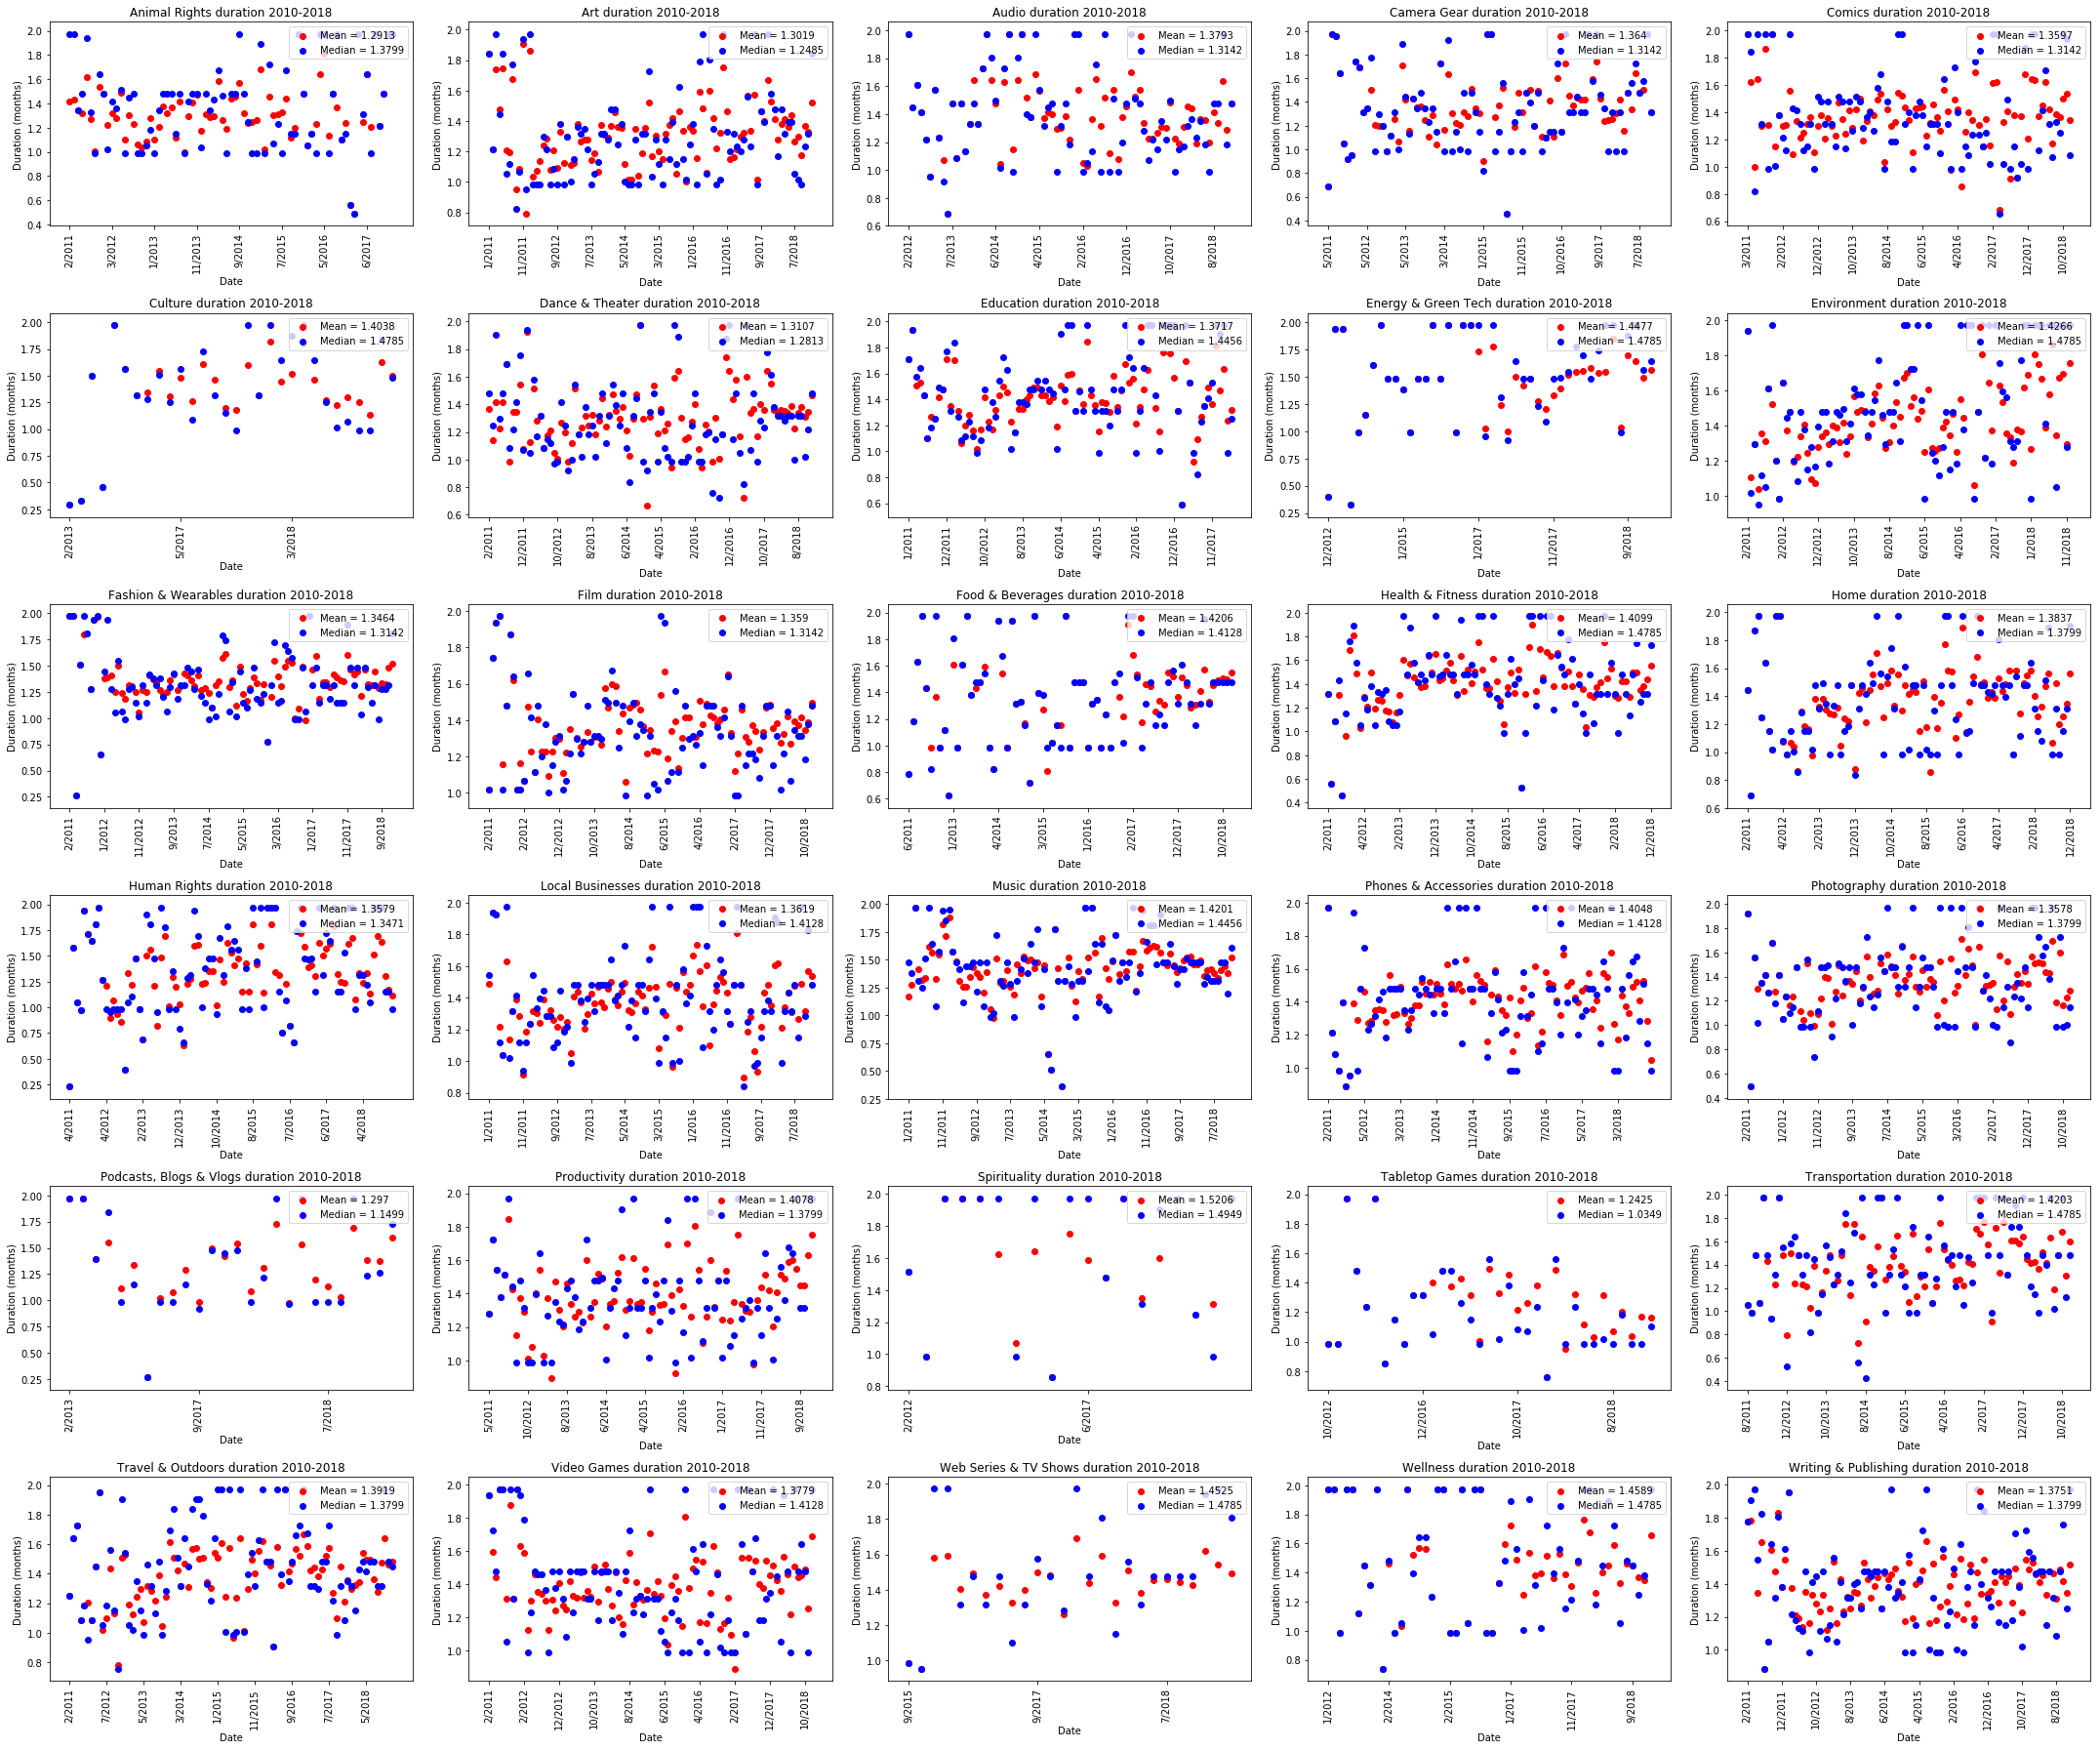

In [46]:
### DURATION PER CATEGORY
category_freq = df2_all['category'].value_counts().to_dict()
category_freq = dict(collections.OrderedDict(sorted(category_freq.items())))
category_keys = list(category_freq.keys())


fig = plt.figure(figsize=(30, 25))
for i in range(len(category_keys)):
    curr_category = category_keys[i]
    temp = df2_all.loc[df2_all['category'] == curr_category]
    category_duration_dict = {}
    
    curr_months = temp['Created At Month/Year'].value_counts().to_dict()
    for j in list(curr_months.keys()):
        temp1 = temp.loc[temp['Created At Month/Year'] == j]
        category_duration_dict[j] = temp1['duration']

    mean_category_duration_dict = {}
    median_category_duration_dict = {}
    for k,v in category_duration_dict.items():
        mean_category_duration_dict[k] = sum(v)/ len(v)
        median_category_duration_dict[k] = statistics.median(v)

    ordered_mean_category_duration_dict = dict(sorted(mean_category_duration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
    ordered_median_category_duration_dict = dict(sorted(median_category_duration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
    
    plt.subplot(6, 5, i+1)

    plt.scatter(list(ordered_mean_category_duration_dict.keys()), list(ordered_mean_category_duration_dict.values()), color = 'red')
    plt.scatter(list(ordered_median_category_duration_dict.keys()), list(ordered_median_category_duration_dict.values()), color = 'blue')
    
    locs, labs = plt.xticks() 
    plt.xticks(locs[0::10], rotation = 'vertical') 
    plt.xlabel('Date')
    plt.ylabel('Duration (months)')
    mean = sum(temp['duration']) / len(temp['duration'])
    med = statistics.median(temp['duration'])
    plt.legend(['Mean = ' + str(round(mean, 4)), 
                'Median = ' + str(round(med, 4))], loc = 'upper right')
    plt.title(curr_category + ' duration 2010-2018')

plt.tight_layout()
plt.show()

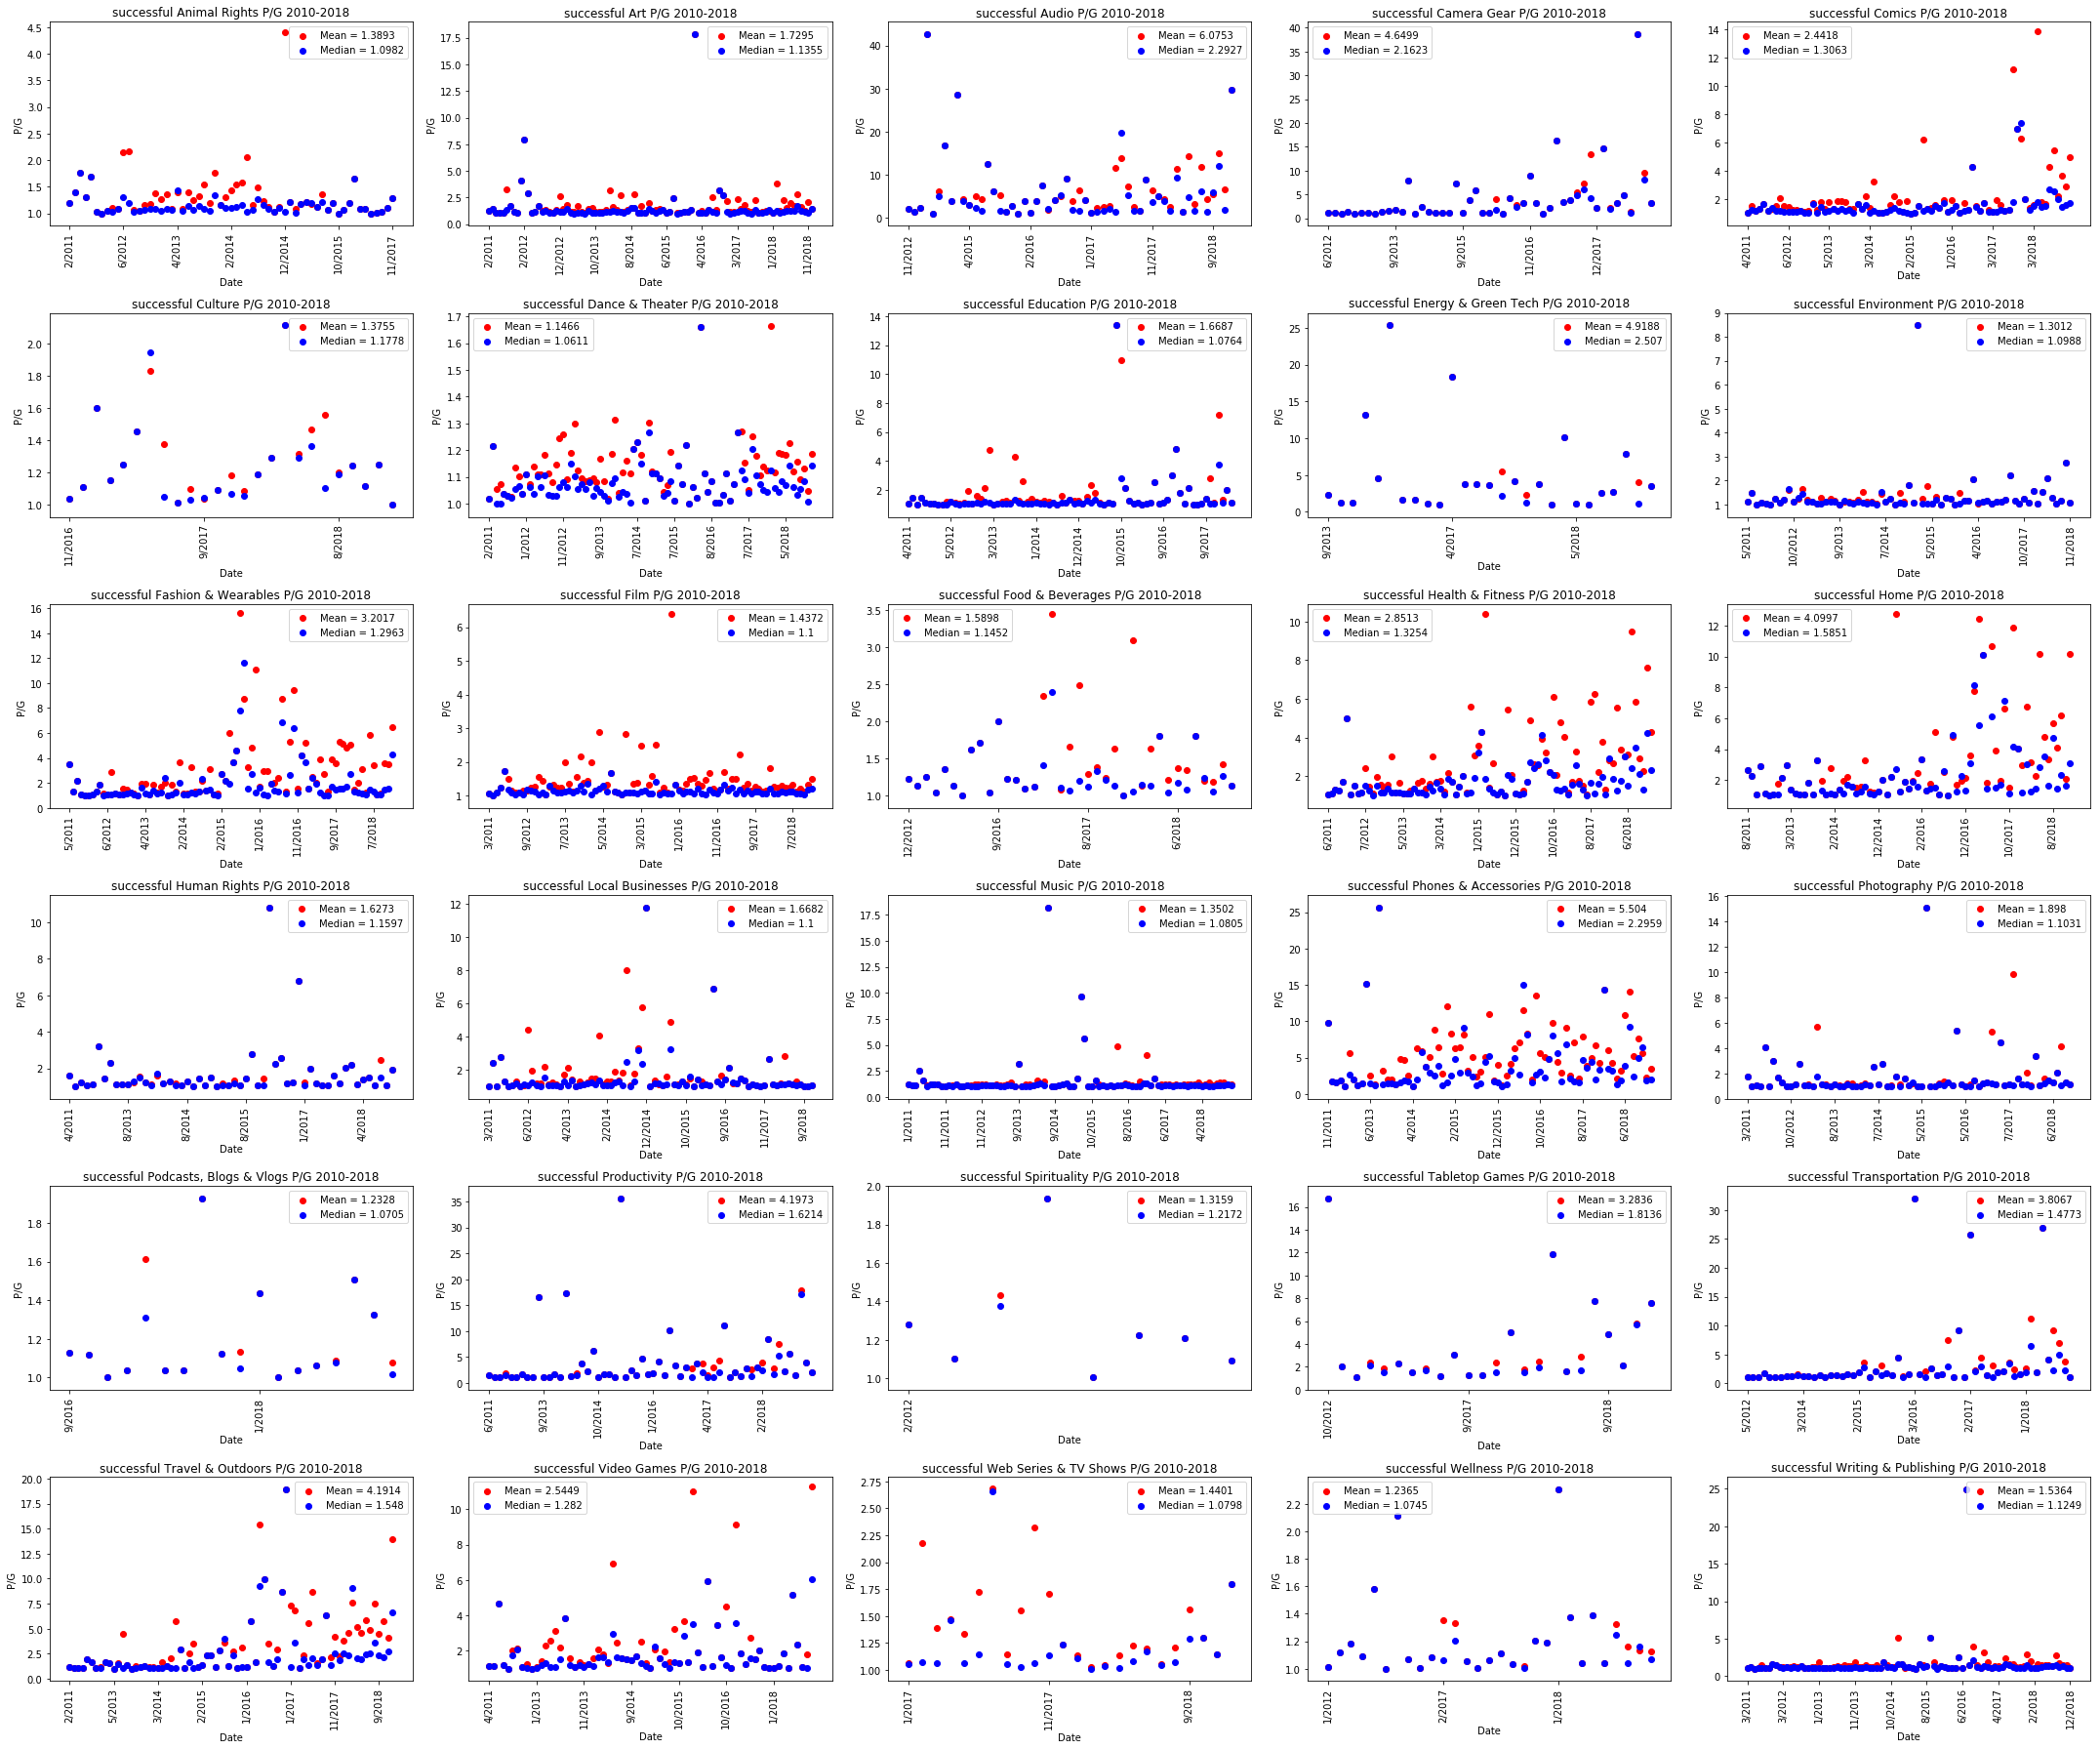

In [47]:
### SUCCESS P/G PER CATEGORY

category_freq = df2_success['category'].value_counts().to_dict()
category_freq = dict(collections.OrderedDict(sorted(category_freq.items())))
category_keys = list(category_freq.keys())

fig = plt.figure(figsize=(30, 25))
for i in range(len(category_keys)):
    curr_category = category_keys[i]
    temp = df2_success.loc[df2_success['category'] == curr_category]
    category_s_pg_dict = {}
    
    curr_months = temp['Created At Month/Year'].value_counts().to_dict()
    for j in list(curr_months.keys()):
        temp1 = temp.loc[temp['Created At Month/Year'] == j]
        category_s_pg_dict[j] = temp1['P/G']

    mean_category_s_pg_dict = {}
    median_category_s_pg_dict = {}
    for k,v in category_s_pg_dict.items():
        mean_category_s_pg_dict[k] = sum(v)/ len(v)
        median_category_s_pg_dict[k] = statistics.median(v)

    ordered_mean_category_s_pg_dict = dict(sorted(mean_category_s_pg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
    ordered_median_category_s_pg_dict = dict(sorted(median_category_s_pg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
    
    plt.subplot(6, 5, i+1)

    plt.scatter(list(ordered_mean_category_s_pg_dict.keys()), list(ordered_mean_category_s_pg_dict.values()), color = 'red')
    plt.scatter(list(ordered_median_category_s_pg_dict.keys()), list(ordered_median_category_s_pg_dict.values()), color = 'blue')
    
    locs, labs = plt.xticks() 
    plt.xticks(locs[0::10], rotation = 'vertical') 
    plt.xlabel('Date')
    plt.ylabel('P/G')
    mean = sum(temp['P/G']) / len(temp['P/G'])
    med = statistics.median(temp['P/G'])
    plt.legend(['Mean = ' + str(round(mean, 4)), 
                'Median = ' + str(round(med, 4))], loc = 'best')
    plt.title('successful ' + curr_category + ' P/G 2010-2018')

plt.tight_layout()
plt.show()

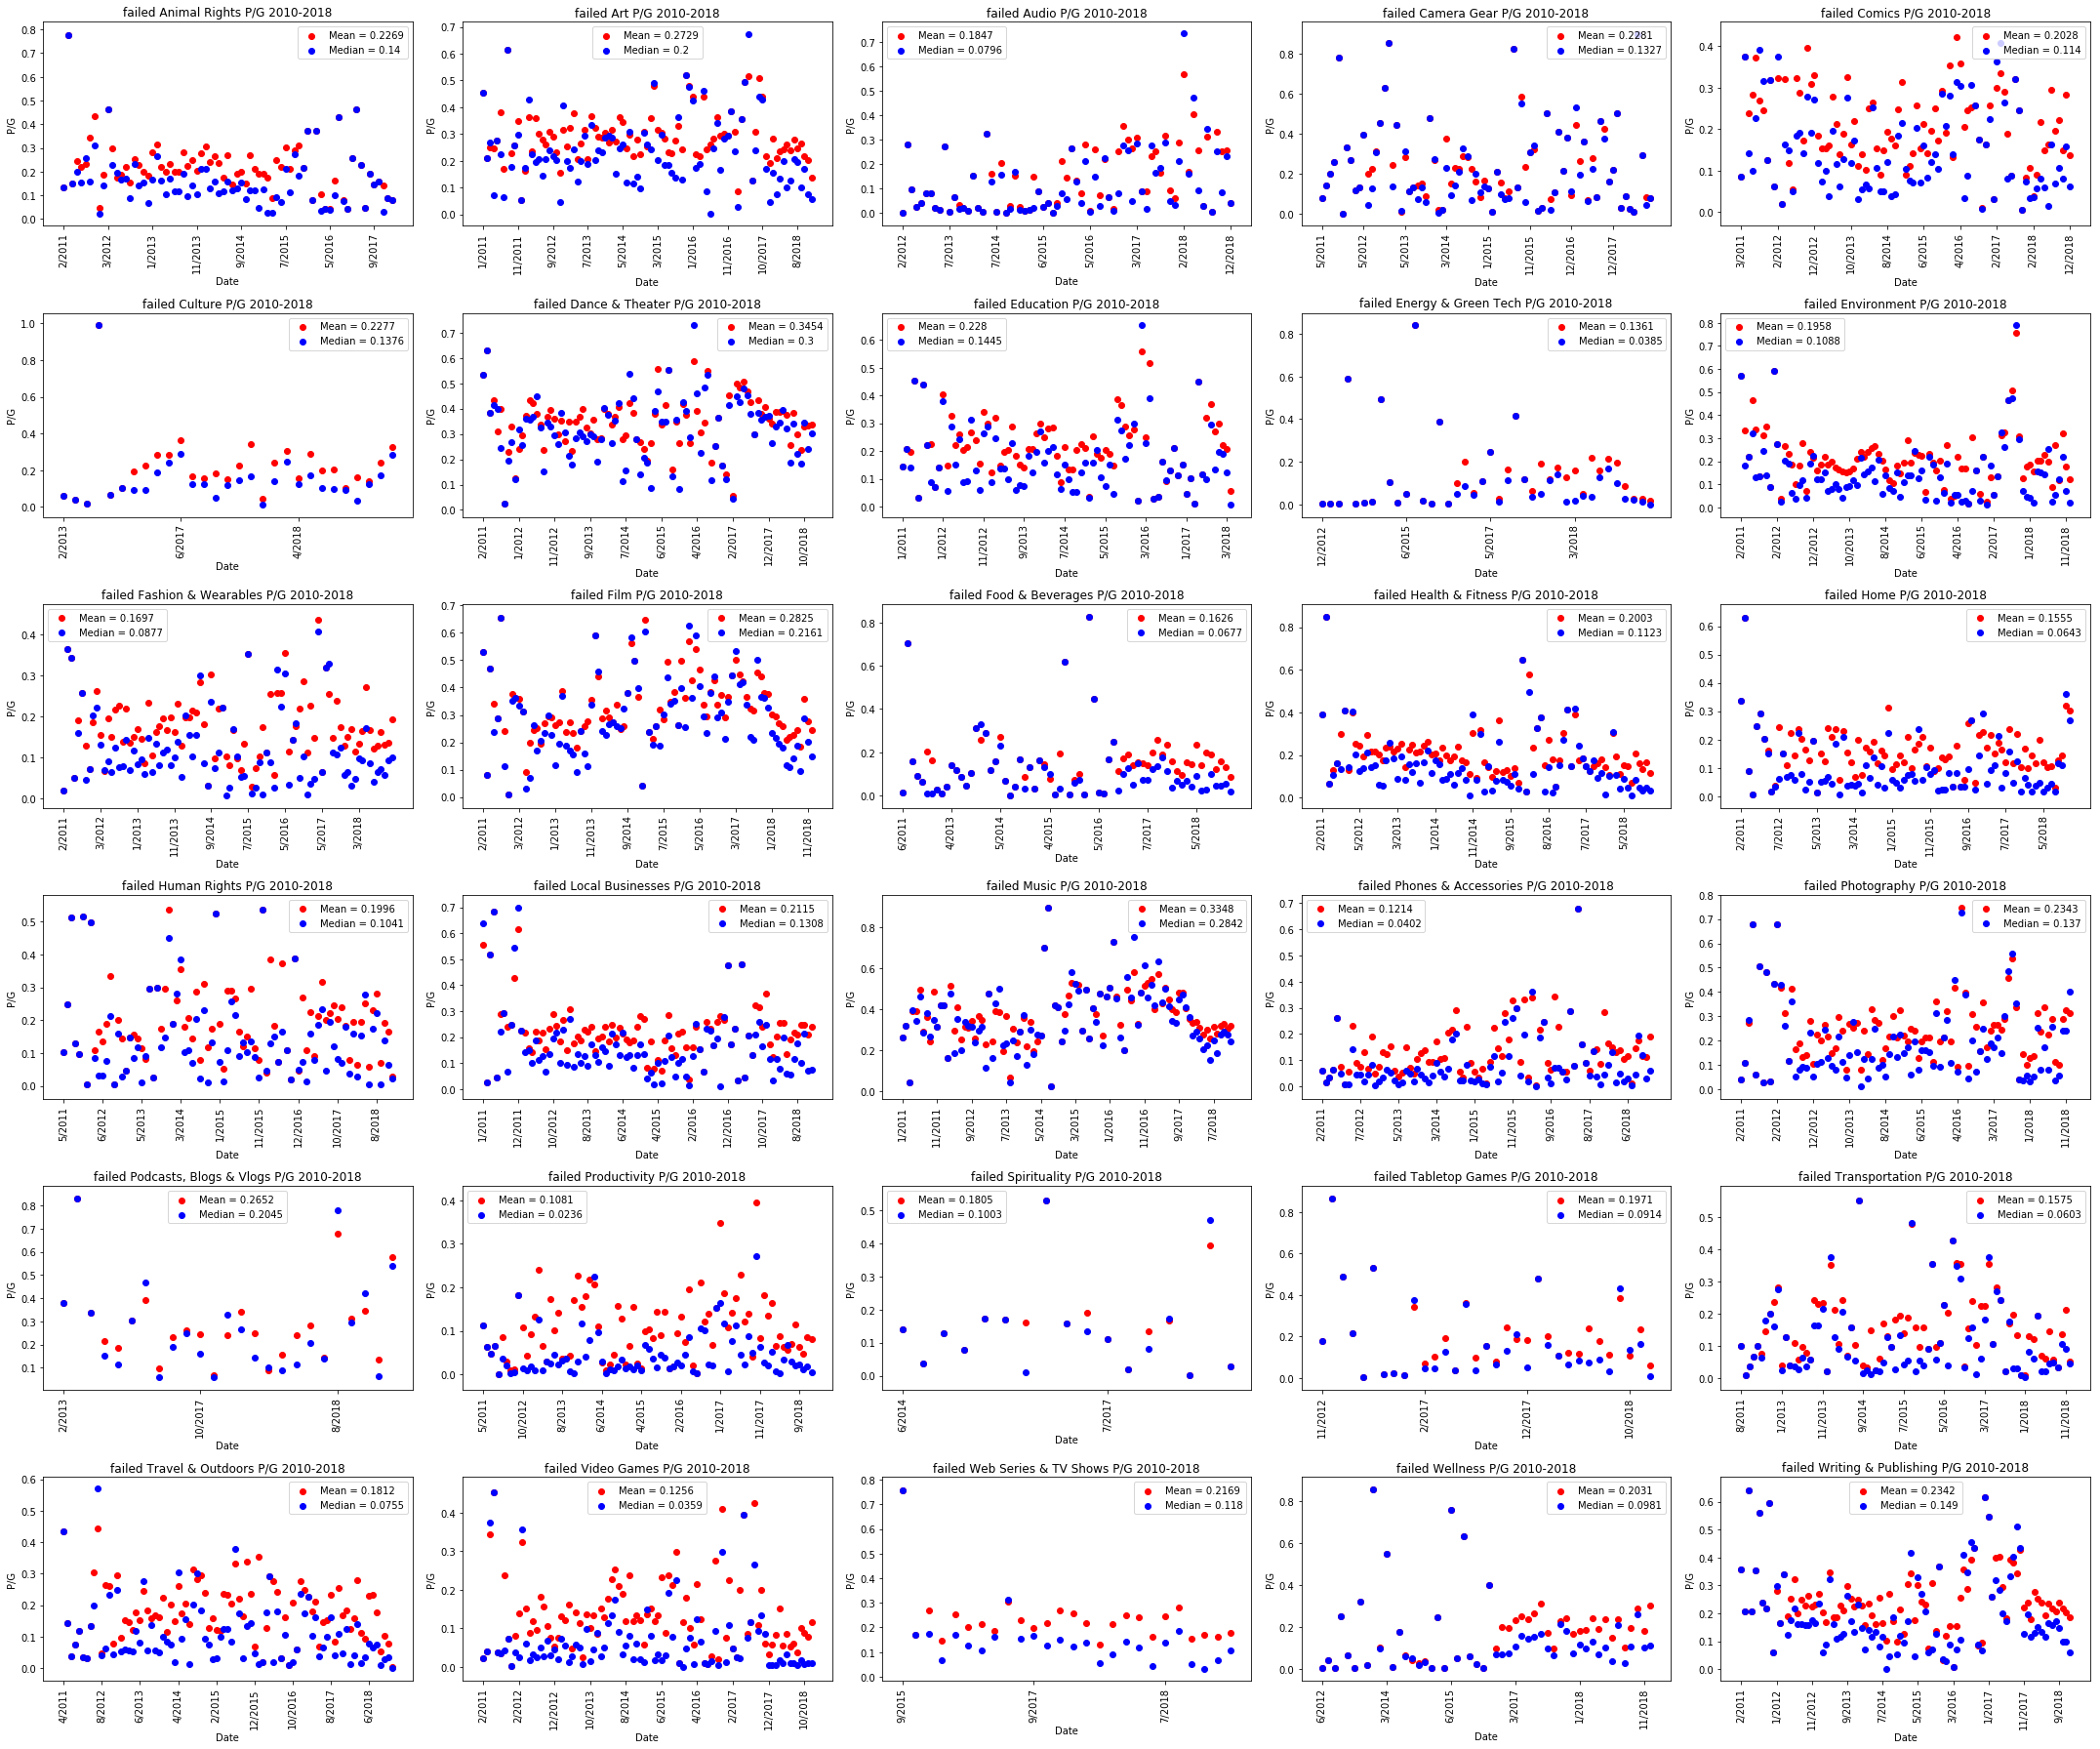

In [48]:
### FAIL P/G PER CATEGORY

category_freq = df2_fail['category'].value_counts().to_dict()
category_freq = dict(collections.OrderedDict(sorted(category_freq.items())))
category_keys = list(category_freq.keys())

fig = plt.figure(figsize=(30, 25))
for i in range(len(category_keys)):
    curr_category = category_keys[i]
    temp = df2_fail.loc[df2_fail['category'] == curr_category]
    category_f_pg_dict = {}
    
    curr_months = temp['Created At Month/Year'].value_counts().to_dict()
    for j in list(curr_months.keys()):
        temp1 = temp.loc[temp['Created At Month/Year'] == j]
        category_f_pg_dict[j] = temp1['P/G']

    mean_category_f_pg_dict = {}
    median_category_f_pg_dict = {}
    for k,v in category_f_pg_dict.items():
        mean_category_f_pg_dict[k] = sum(v)/ len(v)
        median_category_f_pg_dict[k] = statistics.median(v)

    ordered_mean_category_f_pg_dict = dict(sorted(mean_category_f_pg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
    ordered_median_category_f_pg_dict = dict(sorted(median_category_f_pg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
    
    plt.subplot(6, 5, i+1)

    plt.scatter(list(ordered_mean_category_f_pg_dict.keys()), list(ordered_mean_category_f_pg_dict.values()), color = 'red')
    plt.scatter(list(ordered_median_category_f_pg_dict.keys()), list(ordered_median_category_f_pg_dict.values()), color = 'blue')
    
    locs, labs = plt.xticks() 
    plt.xticks(locs[0::10], rotation = 'vertical') 
    plt.xlabel('Date')
    plt.ylabel('P/G')
    mean = sum(temp['P/G']) / len(temp['P/G'])
    med = statistics.median(temp['P/G'])
    plt.legend(['Mean = ' + str(round(mean, 4)), 
                'Median = ' + str(round(med, 4))], loc = 'best')
    plt.title('failed ' + curr_category + ' P/G 2010-2018')

plt.tight_layout()
plt.show()

In [49]:
### SAVE DATAFRAMES

df2_all.to_pickle('../Desktop/saved_dataframes/Store_indiegogo_subset_allprojects.pkl')
df2_success.to_pickle('../Desktop/saved_dataframes/Store_indiegogo_subset_successprojects.pkl')
df2_fail.to_pickle('../Desktop/saved_dataframes/Store_indiegogo_subset_failprojects.pkl')